<!-- Google Fonts -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

<div style="
    border-radius: 15px; 
    border: 2px solid #2e7d32; 
    padding: 20px; 
    background: linear-gradient(125deg, #1b5e20 5%, #43a047 40%, #81c784 75%, #c8e6c9 100%);
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #fff; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 10px; 
        font-size: 36px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        🏦 Bank Marketing 💵
    </h1>
</div>


# 📂 Overview

* **Background** <br>
  In a highly competitive financial environment, banks strive to optimize marketing campaigns for better customer acquisition. One of the key strategies involves **predicting which clients will subscribe to a term deposit** based on past interactions and customer attributes.

* **Goal of the Project** <br>
  Using historical marketing data, we aim to build a predictive model that identifies the likelihood of a customer subscribing to a term deposit, helping the bank to **target potential clients more effectively** and **optimize marketing efforts**.

**Key Features**

**Target Variable**

* `y`: *whether the client has subscribed to a term deposit (binary: 'yes','no')*

**Customer & Contact Attributes** <br>

* `age`: Age of the client.
* `job`: Type of job (e.g., admin, technician, blue-collar, etc.)
* `marital`: Marital status (married, single, divorced).
* `education`: Client's education level.
* `default`: Whether the client has credit in default.
* `balance`: Average yearly balance in euros.
* `housing`: Whether the client has a housing loan.
* `loan`: Whether the client has a personal loan.

**Contact Communication Details** <br>

* `contact`: Contact communication type (cellular or telephone).
* `day`: Last contact day of the month.
* `month`: Last contact month of the year.
* `duration`: Last contact duration in seconds (note: this feature highly affects the target and should be handled carefully in modeling).

**Campaign-Related Attributes** <br>

* `campaign`: Number of contacts performed during this campaign.
* `pdays`: Number of days since the client was last contacted from a previous campaign.
* `previous`: Number of contacts performed before this campaign.
* `poutcome`: Outcome of the previous marketing campaign.

**Files Provided**

* `train.csv`: The train dataset.
* `test.csv`: The test dataset (no target).
* `bank_full.csv`: The original dataset.
* `sample_submission.csv`: Template file for submitting predictions.

(Source: [Kaggle Dataset s5e8](https://www.kaggle.com/competitions/playground-series-s5e8)) <br>
(Source: [Kaggle Dataset – Bank Marketing Dataset Full](https://www.kaggle.com/datasets/sushant097/bank-marketing-dataset-full/data))

**Project Objective**

The primary objective of this notebook is to **perform EDA and build predictive models** to classify whether a client will subscribe to a term deposit.

Key components of the approach include:

* **Exploratory Data Analysis (EDA):** Visualize distributions and examine relationships between variables and the target.
* **Feature Engineering:** Encode categorical variables, deal with imbalances, and preprocess durations and campaign-related features.
* **Modeling:** Train multiple classification models (e.g., Logistic Regression, Random Forest, XGBoost) to compare performance.
* **Evaluation Framework:**

  * Metrics: Accuracy, F1-score, ROC-AUC.
  * Tools: Confusion matrix, ROC Curve.
  * Strategy: Cross-validation and hyperparameter tuning.

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Import Libraries</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #2e7d32; 
    padding: 20px; 
    background: linear-gradient(125deg, #1b5e20 5%, #43a047 40%, #81c784 75%, #c8e6c9 100%);
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #fff; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 10px; 
        font-size: 36px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Import Libraries
    </h1>
</div>


In [28]:
# Core data manipulation libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import shap

# Statistical functions
from scipy.stats import skew

# Display utilities for Jupyter notebooks
from IPython.display import display

# Machine learning preprocessing and modeling
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import OneHotEncoder, RobustScaler, OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

# Metrics
from sklearn.metrics import (roc_curve, roc_auc_score, classification_report, confusion_matrix,
                             precision_recall_curve, auc)

# Statistical
from scipy.stats import chi2_contingency
from scipy.stats import shapiro, probplot
from scipy.stats import mannwhitneyu
from scipy.stats import levene
from scipy.stats import ttest_ind
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import kruskal
from scipy.stats import anderson
from scipy.stats import normaltest
import scikit_posthocs as sp

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", 500) # To display all the columns of dataframe
pd.set_option("max_colwidth", None) # To set the width of the column to maximum

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Load Data</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #2e7d32; 
    padding: 20px; 
    background: linear-gradient(125deg, #1b5e20 5%, #43a047 40%, #81c784 75%, #c8e6c9 100%);
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #fff; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 10px; 
        font-size: 36px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Load Data
    </h1>
</div>

In [29]:
# Load the datasets
df_train = pd.read_csv("train.csv")
df_origin = pd.read_csv("bank-full.csv", sep=";")
df_test = pd.read_csv("test.csv")

# Verify shapes
print("Train Data Shape:", df_train.shape)
print("\nOrigin Data Shape:", df_origin.shape)
print("\nTest Data Shape:", df_test.shape)

Train Data Shape: (750000, 18)

Origin Data Shape: (45211, 17)

Test Data Shape: (250000, 17)


<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Data Preview and Info</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #2e7d32; 
    padding: 20px; 
    background: linear-gradient(125deg, #1b5e20 5%, #43a047 40%, #81c784 75%, #c8e6c9 100%);
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #fff; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 10px; 
        font-size: 36px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Data Preview and Info
    </h1>
</div>

In [30]:
# Display few rows of each dataset
print("Train Data Preview:")
display(df_train.head())

print("\nOrigin Data Preview:")
display(df_origin.head())

print("\nTest Data Preview:")
display(df_test.head())

Train Data Preview:


,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1



Origin Data Preview:


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no



Test Data Preview:


,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,750000,32,blue-collar,married,secondary,no,1397,yes,no,unknown,21,may,224,1,-1,0,unknown
1,750001,44,management,married,tertiary,no,23,yes,no,cellular,3,apr,586,2,-1,0,unknown
2,750002,36,self-employed,married,primary,no,46,yes,yes,cellular,13,may,111,2,-1,0,unknown
3,750003,58,blue-collar,married,secondary,no,-1380,yes,yes,unknown,29,may,125,1,-1,0,unknown
4,750004,28,technician,single,secondary,no,1950,yes,no,cellular,22,jul,181,1,-1,0,unknown


In [31]:
# Display information about the DataFrames
print("Train Data Info:")
df_train.info()

print("\nOrigin Data Info:")
df_origin.info()

print("\nTest Data Info:")
df_test.info()

Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         750000 non-null  int64 
 1   age        750000 non-null  int64 
 2   job        750000 non-null  object
 3   marital    750000 non-null  object
 4   education  750000 non-null  object
 5   default    750000 non-null  object
 6   balance    750000 non-null  int64 
 7   housing    750000 non-null  object
 8   loan       750000 non-null  object
 9   contact    750000 non-null  object
 10  day        750000 non-null  int64 
 11  month      750000 non-null  object
 12  duration   750000 non-null  int64 
 13  campaign   750000 non-null  int64 
 14  pdays      750000 non-null  int64 
 15  previous   750000 non-null  int64 
 16  poutcome   750000 non-null  object
 17  y          750000 non-null  int64 
dtypes: int64(9), object(9)
memory usage: 103.0+ MB

Origin Data Info:
<

## Insights from Initial Data Exploration

**Dataset Size and Structure**  
   - The **training dataset** contains **750000** samples with 18 columns, including the target variable `y`.
   - The **original dataset** has **45211** samples and 17 columns, similar in structure but smaller in size. 
   - The **test dataset** includes **250000** samples with 17 columns (without the target), ready for prediction.

**Feature Overview**
* The dataset includes all relevant attributes for predicting customer response to marketing campaigns:
  * **Numerical features:** `age`, `balance`, `day`, `duration`, `campaign`, `pdays`, `previous`.
  * **Categorical features:** `job`, `marital`, `education`, `default`, `housing`, `loan`, `contact`, `month`, `poutcome`.
* The target variable is categorical, representing whether the client has subscribed to a term deposit (`y`: `'yes'` or `'no'`).

**Data Consistency and Completeness**  
   - The datasets have **no missing values**, which simplifies preprocessing and modeling.
   - Data types are appropriate: numerical features are float64 and int64, and categorical features are objects (strings).
   - The column `id` is not meaningful for analysis. So this column is not really a part of the information we should care about. We can drop this column for both train and test data.

**Differences Between Datasets**  
   - The training data has an additional `id` column, which uniquely identifies each sample.  
   - The original dataset excludes the `id` column but contains the same features and target.

In [32]:
df_train.drop("id", axis=1, inplace=True)
list_test_id = df_test["id"].copy().to_list()
df_test.drop("id", axis=1, inplace=True)

In [33]:
print("Train Data describe:")
cm = sns.light_palette("green", as_cmap=True)
display(df_train.drop(columns="y", axis=1).describe().T.style.background_gradient(cmap=cm))

print("\nOrigin Data describe:")
display(df_origin.drop(columns="y", axis=1).describe().T.style.background_gradient(cmap=cm))

print("\nTest Data describe:")
display(df_test.describe().T.style.background_gradient(cmap=cm))

Train Data describe:


,count,mean,std,min,25%,50%,75%,max
age,750000.000000,40.926395,10.098829,18.000000,33.000000,39.000000,48.000000,95.000000
balance,750000.000000,1204.067397,2836.096759,-8019.000000,0.000000,634.000000,1390.000000,99717.000000
day,750000.000000,16.117209,8.250832,1.000000,9.000000,17.000000,21.000000,31.000000
duration,750000.000000,256.229144,272.555662,1.000000,91.000000,133.000000,361.000000,4918.000000
campaign,750000.000000,2.577008,2.718514,1.000000,1.000000,2.000000,3.000000,63.000000
pdays,750000.000000,22.412733,77.319998,-1.000000,-1.000000,-1.000000,-1.000000,871.000000
previous,750000.000000,0.298545,1.335926,0.000000,0.000000,0.000000,0.000000,200.000000



Origin Data describe:


,count,mean,std,min,25%,50%,75%,max
age,45211.000000,40.936210,10.618762,18.000000,33.000000,39.000000,48.000000,95.000000
balance,45211.000000,1362.272058,3044.765829,-8019.000000,72.000000,448.000000,1428.000000,102127.000000
day,45211.000000,15.806419,8.322476,1.000000,8.000000,16.000000,21.000000,31.000000
duration,45211.000000,258.163080,257.527812,0.000000,103.000000,180.000000,319.000000,4918.000000
campaign,45211.000000,2.763841,3.098021,1.000000,1.000000,2.000000,3.000000,63.000000
pdays,45211.000000,40.197828,100.128746,-1.000000,-1.000000,-1.000000,-1.000000,871.000000
previous,45211.000000,0.580323,2.303441,0.000000,0.000000,0.000000,0.000000,275.000000



Test Data describe:


,count,mean,std,min,25%,50%,75%,max
age,250000.000000,40.932332,10.081613,18.000000,33.000000,39.000000,48.000000,95.000000
balance,250000.000000,1197.426352,2741.520699,-8019.000000,0.000000,631.000000,1389.000000,98517.000000
day,250000.000000,16.116068,8.258509,1.000000,9.000000,17.000000,21.000000,31.000000
duration,250000.000000,255.342260,271.404326,3.000000,91.000000,133.000000,353.000000,4918.000000
campaign,250000.000000,2.573548,2.709661,1.000000,1.000000,2.000000,3.000000,58.000000
pdays,250000.000000,22.280028,76.915879,-1.000000,-1.000000,-1.000000,-1.000000,871.000000
previous,250000.000000,0.303728,1.384574,0.000000,0.000000,0.000000,0.000000,150.000000


## Numerical Feature Summary — Data Analyst Perspective

**1. `age` – Customer Age**

* **Consistent distribution** across the `origin`, `train`, and `test` datasets.
* Age ranges from **18 to 95**, with an average around **41 years old**.

**2. `balance` – Yearly Average Balance (EUR)**

* Includes negative values down to **-8019 EUR**, and extreme values up to over **102,000 EUR** → **skewed distribution** with clear **outliers**.
* The mean balance in `train` and `test` sets is slightly lower compared to the `origin` dataset.

**3. `day` – Day of Last Contact**

* Represents the **day of the month** (1–31) when the contact occurred.
* Fairly uniform distribution, with a mean of approximately **16**.

**4. `duration` – Last Contact Duration (seconds)**

* Average duration is around **256 seconds**, with high standard deviation (±270s); some calls lasted up to **4918 seconds (\~82 minutes)**.

**5. `campaign` – Number of Contacts During Current Campaign**

* Average around **2.6 contact attempts**, with some clients being contacted up to **63 times**.

**6. `pdays` – Days Since Previous Campaign Contact**

* The value **-1 is dominant**, indicating the client **was never contacted before**.

**7. `previous` – Number of Past Contacts**

* Mostly **0** (no previous contact), though some cases reach **200 (Train data), 275 (Origin data), 150 (Test data)**.
* Very low average (\~0.3), with a highly skewed distribution.

**Overall Insights**

* These numerical features reflect both **demographic characteristics** and **interaction levels** in the marketing campaign.
* Some variables (like `duration`, `pdays`) carry important behavioral signals, but **must be carefully handled** to avoid misinterpretation or data leakage.

In [34]:
print("Train Data describe:")
display(df_train.drop(columns="y", axis=1).describe(include=["category", "object"]).T)

print("Origin Data describe:")
display(df_origin.drop(columns="y", axis=1).describe(include=["category", "object"]).T)

print("Test Data describe:")
display(df_test.describe(include=["category", "object"]).T)

Train Data describe:


,count,unique,top,freq
job,750000,12,management,175541
marital,750000,3,married,480759
education,750000,4,secondary,401683
default,750000,2,no,737151
housing,750000,2,yes,411288
loan,750000,2,no,645023
contact,750000,3,cellular,486655
month,750000,12,may,228411
poutcome,750000,4,unknown,672450


Origin Data describe:


,count,unique,top,freq
job,45211,12,blue-collar,9732
marital,45211,3,married,27214
education,45211,4,secondary,23202
default,45211,2,no,44396
housing,45211,2,yes,25130
loan,45211,2,no,37967
contact,45211,3,cellular,29285
month,45211,12,may,13766
poutcome,45211,4,unknown,36959


Test Data describe:


,count,unique,top,freq
job,250000,12,management,58636
marital,250000,3,married,160412
education,250000,4,secondary,133724
default,250000,2,no,245843
housing,250000,2,yes,136534
loan,250000,2,no,214957
contact,250000,3,cellular,162462
month,250000,12,may,76009
poutcome,250000,4,unknown,224115


## Categorical Feature Summary — Data Analyst Perspective

**1. `job` – Type of Job**

* Contains **12 job categories** (e.g., admin, technician, blue-collar, etc.).
* Most frequent categories:

  * `Origin`: **blue-collar** (\~21.5%)
  * `Train` & `Test`: **management** (\~23%)
* Distribution varies across datasets.

**2. `marital` – Marital Status**

* 3 categories: `married`, `single`, `divorced`.
* `married` is the most common (\~60–64%) in all datasets.

**3. `education` – Education Level**

* 4 categories: `primary`, `secondary`, `tertiary`, `unknown`.
* `secondary` is the most common (\~50–53%) across all datasets.

**4. `default` – Has Credit in Default**

* Binary: `yes`/`no`, with `no` being the dominant value (≥97%).

**5. `housing` – Has Housing Loan**

* Binary: `yes`/`no`.
* Fairly balanced: `yes` accounts for \~55% in all datasets.

**6. `loan` – Has Personal Loan**

* Binary: `yes`/`no`.
* Most customers do not have personal loans (`no` \~85–86%).

**7. `contact` – Contact Communication Type**

* 3 values: `cellular`, `telephone`, `unknown`.
* `cellular` is the most common (\~65%+).

**8. `month` – Last Contact Month**

* All **12 months** are represented, but distribution is highly skewed.

  * `may` is the dominant month (>30% in all datasets).

**9. `poutcome` – Outcome of Previous Campaign**

* 4 categories: `success`, `failure`, `other`, `unknown`.
* `unknown` dominates (\~85–90%) across datasets.

**Overall Insights**

* Features like `marital`, `education`, `housing`, and `loan` have **stable and informative distributions**.
* Some features are **highly imbalanced** (`default`, `poutcome`, `job`) and may require special treatment before modeling.

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Data Quality Checks</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #2e7d32; 
    padding: 20px; 
    background: linear-gradient(125deg, #1b5e20 5%, #43a047 40%, #81c784 75%, #c8e6c9 100%);
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #fff; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 10px; 
        font-size: 36px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Data Quality Checks
    </h1>
</div>


## Missing Value

In [35]:
def displayNULL(df, dataset_name=None):
    total_rows = len(df)

    missing_df = df.isnull().sum().reset_index()
    missing_df.columns = ["Feature", "Missing_Count"]
    missing_df = missing_df[missing_df["Missing_Count"] > 0]
    missing_df["Missing_%"] = (missing_df["Missing_Count"] / total_rows * 100).round(2)
    missing_df = missing_df.sort_values(by="Missing_Count", ascending=False).reset_index(drop=True)

    total_missing = missing_df["Missing_Count"].sum()

    print("=" * 40)
    if dataset_name:
        print(f"🔎 Missing Value Summary for: {dataset_name}")
    else:
        print("🔎 Missing Value Summary:")
    print("=" * 40)
    
    if total_missing == 0:
        print(f"✅ No missing values detected in {total_rows:,} rows.")
    else:
        try:
            from tabulate import tabulate
            print(tabulate(missing_df, headers="keys", tablefmt="pretty", showindex=False, colalign=("left", "left", "left")))
        except ImportError:
            print(missing_df.to_string(index=False))
        
        print(f"\n⚠️  Total missing values: {total_missing:,} out of {total_rows:,} rows.")

print("Missing value train dataset: ")
displayNULL(df_train, dataset_name="Train Set")

print("\nMissing value Origin dataset: ")
displayNULL(df_origin, dataset_name="Origin Set")

print("\nMissing value test dataset: ")
displayNULL(df_test, dataset_name="Test Set")

Missing value train dataset: 
🔎 Missing Value Summary for: Train Set
✅ No missing values detected in 750,000 rows.

Missing value Origin dataset: 
🔎 Missing Value Summary for: Origin Set
✅ No missing values detected in 45,211 rows.

Missing value test dataset: 
🔎 Missing Value Summary for: Test Set
✅ No missing values detected in 250,000 rows.


## Checking duplicate Value

In [36]:
def check_duplicates_report(df, dataset_name):
    duplicates_count = df.duplicated().sum()
    total_rows = len(df)
    
    print("=" * 40)
    print(f"🔍 {dataset_name} Duplicate Analysis")
    print("=" * 40)
    
    if duplicates_count == 0:
        print(f"✅ No duplicates found in {total_rows:,} rows")
    else:
        print(f"⚠️  {duplicates_count} duplicates found ({duplicates_count/total_rows:.2%})")
        print(f"    Total rows affected: {duplicates_count:,}/{total_rows:,}")

datasets = {
    "Training Data": df_train,
    "Origin Data":  df_origin,
    "Test Data": df_test
}

duplicate_summary = {}
for name, data in datasets.items():
    check_duplicates_report(data, name)
    duplicate_summary[name] = {
        "duplicates": data.duplicated().sum(),
        "total_rows": len(data)
    }
    print()

🔍 Training Data Duplicate Analysis
✅ No duplicates found in 750,000 rows

🔍 Origin Data Duplicate Analysis
✅ No duplicates found in 45,211 rows

🔍 Test Data Duplicate Analysis
✅ No duplicates found in 250,000 rows



## Checking Outlier Value

In [37]:
num_features = ["age", "balance", "day", "duration", "campaign", "pdays", "previous"]
cat_features = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome"]

def checking_outlier(list_feature, df, dataset_name):
    print("=" * 40)
    print(f"🔍 {dataset_name} Checking outlier")
    print("=" * 40)
    outlier_info = []
    for feature in list_feature:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)][feature]
        if len(outliers) == 0:
            pass
        else:
            outlier_info.append({
            "Feature": feature,
            "Outlier Count": len(outliers),
            # "Outlier Detail": outliers.tolist()
            })
    return pd.DataFrame(outlier_info)

checking_outlier(list_feature=num_features, df=df_train, dataset_name="Training data")

🔍 Training data Checking outlier


,Feature,Outlier Count
0,age,4903
1,balance,57745
2,duration,46118
3,campaign,40686
4,pdays,77566
5,previous,77569


In [38]:
checking_outlier(list_feature=num_features, df=df_origin, dataset_name="Origin data")

🔍 Origin data Checking outlier


,Feature,Outlier Count
0,age,487
1,balance,4729
2,duration,3235
3,campaign,3064
4,pdays,8257
5,previous,8257


In [39]:
checking_outlier(list_feature=num_features, df=df_test, dataset_name="Test data")

🔍 Test data Checking outlier


,Feature,Outlier Count
0,age,1637
1,balance,19137
2,duration,16531
3,campaign,13560
4,pdays,25888
5,previous,25890


## Data Quality Insights: Missing Values, Duplicates and Outliers.

**Missing Values Analysis**

* We conducted a thorough examination for missing values across the **train**, **test**, and **original** datasets.

* **No missing values** were detected — ensuring clean synthetic data for model training.

**Duplicate Records Analysis**

* We performed a check for exact duplicate rows that could artificially inflate performance or introduce bias.

* **No duplicates** detected across the **train**, **test**, and **original** datasets. — ensuring test predictions are made on unique samples.

**Outlier Analysis**

* We also examined the datasets for checking outliers.
* **The outliers** were found in dataset at features. But we can not remove them since these outliers reflect reality.
* Both **train**, **origin** and **test** datasets contain **notable outliers** in `age`, `balance`, `duration`, `campaign`, `pdays`, `previous`.

**Conclusion**

* The **training, origin and test datasets** exhibit excellent data quality with **no missing or duplicate entries**.
* The outlier value exist across the **train**, **test**, and **original** datasets.

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Exploratory Data Analysis (EDA)</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #2e7d32; 
    padding: 20px; 
    background: linear-gradient(125deg, #1b5e20 5%, #43a047 40%, #81c784 75%, #c8e6c9 100%);
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #fff; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 10px; 
        font-size: 36px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Exploratory Data Analysis (EDA)
    </h1>
</div>

**Statistical**

✅ Are the Assumptions of T-Test and ANOVA the Same?
Yes — T-Test and ANOVA share very similar assumptions, as both are parametric tests used to compare group means. However, there are slight differences due to their intended use.

✅ Common Assumptions for Both T-Test and ANOVA

| **Assumption**                 | **T-Test**                                        | **ANOVA**                             |
| ------------------------------ | ------------------------------------------------- | ------------------------------------- |
| **1. Dependent variable**      | Continuous                                        | Continuous                            |
| **2. Grouping variable**       | Categorical with **2 groups**                     | Categorical with **3 or more groups** |
| **3. Normality**               | Data in each group should be normally distributed | Same as T-Test                        |
| **4. Homogeneity of variance** | Equal variances across groups (`equal_var=True`)  | Same as T-Test                        |
| **5. Independence**            | Observations must be independent                  | Same as T-Test                        |

🔄 Key Differences Between T-Test and ANOVA

| **Criterion**           | **T-Test**                   | **ANOVA**                                       |
| ----------------------- | ---------------------------- | ----------------------------------------------- |
| Number of groups        | Compares **2 groups**        | Compares **3 or more groups**                   |
| Post-hoc tests required | Not required                 | Required if significant (e.g., **Tukey’s HSD**) |
| Types of tests          | Independent or Paired T-Test | One-Way or Repeated Measures ANOVA              |

📌 Alternatives When Assumptions Are Violated

| **Violation**           | **T-Test Alternative**  | **ANOVA Alternative**   |
| ----------------------- | ----------------------- | ----------------------- |
| Non-normal distribution | **Mann–Whitney U Test** | **Kruskal–Wallis Test** |
| Unequal variances       | **Welch’s T-Test**      | **Welch’s ANOVA**       |

In [40]:
def color(n_colors=2):
    cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
    positions = np.linspace(0, 1, n_colors)
    colors = [cmap(p) for p in positions]
    return colors

In [41]:
def cal_ChiSquare(cat_feature, target_feature, df, show_expected=False, show_residuals=False):
    """
    Perform a Chi-Square test of independence to evaluate whether two categorical variables 
    are statistically associated (i.e., dependent) or independent from each other.

    This function tests the null hypothesis that the two categorical variables are independent.
    It prints the test statistic, degrees of freedom, p-value, and an interpretation based on the p-value.
    Optionally, it displays the expected frequency table under independence, and standardized residuals 
    (including a heatmap) which help to identify specific group-level deviations.

    Parameters
    ----------
    cat_feature : str
        Name of the first categorical variable (typically the feature).
    
    target_feature : str
        Name of the second categorical variable (typically the target label).
    
    df : pd.DataFrame
        The input DataFrame containing the data.
    
    show_expected : bool, default=False
        If True, prints the expected frequencies under the assumption of independence.
    
    show_residuals : bool, default=False
        If True, prints the standardized residuals and shows them as a heatmap 
        to identify where the strongest associations/deviations occur.

    Returns
    -------
    None
        Prints the Chi-Square test result, including statistical significance interpretation.
        Optionally prints expected values and standardized residuals.

    Notes
    -----
    - Hypotheses:
        H₀ (Null):     The two variables are independent (no association).
        H₁ (Alt.):      There is a dependency or association between the variables.
    
    - Interpretation:
        If p-value < 0.05 → Reject H₀ → Conclude that the variables are significantly associated.
        If p-value ≥ 0.05 → Fail to reject H₀ → No statistically significant association found.

    - Standardized residuals:
        - Values > +2 or < -2 indicate strong deviation from expected frequency (local dependency).
        - Useful for identifying specific group-level contributions to the overall Chi-Square result.

    References
    ----------
    - https://en.wikipedia.org/wiki/Chi-squared_test
    - https://www.scribbr.com/statistics/chi-square-test-of-independence/
    """
    print(f"\n🔍 Chi-Square Test of Independence: '{cat_feature}' vs. '{target_feature}'")

    # Contingency table
    crosstab = pd.crosstab(df[cat_feature], df[target_feature])
    chi2, p, dof, expected = chi2_contingency(crosstab)

    print(f"Chi-squared statistic: {chi2:.3f}")
    print(f"Degrees of freedom: {dof}")
    print(f"p-value: {p:.6f}")

    if p < 0.05:
        print("✅ Result: p-value < 0.05 → Reject H₀")
        print(f"→ There is a **statistically significant association** between '{cat_feature}' and '{target_feature}'.")
    else:
        print("❎ Result: p-value ≥ 0.05 → Fail to reject H₀")
        print(f"→ No statistically significant association between '{cat_feature}' and '{target_feature}'.")

    # Optional: show expected frequencies
    if show_expected:
        print("\n📊 Expected Frequencies:")
        print(pd.DataFrame(expected, index=crosstab.index, columns=crosstab.columns))
    else:
        pass

    # Optional: show standardized residuals
    if show_residuals:
        cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
        residuals = (crosstab - expected) / np.sqrt(expected)
        print("\n📈 Standardized Residuals:")
        print(round(residuals, 2))

        # Heatmap of residuals
        plt.figure(figsize=(6, 4))
        sns.heatmap(residuals, annot=True, cmap=cmap, center=0, fmt=".2f", linewidths=0.5)
        plt.title(f"Standardized Residuals Heatmap: {cat_feature} vs {target_feature}")
        plt.ylabel(cat_feature)
        plt.xlabel(target_feature)
        plt.tight_layout()
        plt.show()
    else:
        pass

def cal_shapiro(cat_feature, num_feature, df, plot_result=False):
    """
    Perform the Shapiro–Wilk test to assess normality of a numerical feature 
    within each group defined by a categorical feature.

    This function iterates through all unique, non-null values of a categorical variable,
    and applies the Shapiro–Wilk test to the corresponding subgroup of the numeric variable.
    Optionally, it displays a Q-Q plot to visually assess the distribution.

    Parameters
    ----------
    cat_feature : str
        The name of the categorical column that defines the groups.

    num_feature : str
        The name of the numerical column to test for normality.

    df : pd.DataFrame
        The input DataFrame containing the data.

    plot_result : bool, optional (default=False)
        If True, displays a Q-Q plot for each group to visually assess normality.

    Returns
    -------
    None
        Prints the Shapiro–Wilk test statistic and p-value for each group,
        and optionally shows a Q-Q plot.

    Notes
    -----
    - H₀ (null hypothesis): The data is normally distributed.
    - H₁ (alternative): The data is not normally distributed.
    - If p > 0.05 → fail to reject H₀ → data appears normal.
    - If p ≤ 0.05 → reject H₀ → data likely not normal.
    - The test is not reliable for n > 5000 (as per scipy recommendation).
    - Requires at least 3 non-null values per group.

    References
    ----------
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html
    - https://www.statskingdom.com/shapiro-wilk-test.html
    """

    print(f"🔎 Shapiro-Wilk Normality Test for {num_feature} across {cat_feature} groups")

    for group in df[cat_feature].dropna().unique():
        data = df[df[cat_feature] == group][num_feature].dropna()
        n = len(data)

        if n < 3:
            print(f"⚠️ Group {group} has too few values ({n}) to perform Shapiro-Wilk test.")
        elif n > 5000:
            print(f"⚠️ Group {group} has {n} samples. Shapiro-Wilk may not be reliable for n > 5000.")
        else:
            stat, p = shapiro(data)
            print(f"Group: {group}")
            print(f"  Shapiro-Wilk statistic: {stat:.3f}")
            print(f"  p-value: {p}")
            if p > 0.05:
                print(f" 🟢 Group '{group}' appears to follow a normal distribution.\n")
            else:
                print(f" ⚪ Group '{group}' does not appear to follow a normal distribution.\n")

            if plot_result:
                probplot(data, dist="norm", plot=plt)
                plt.title(f"QQ Plot - {group}")
                plt.show()
            else:
                pass

def cal_levene(dataframe, categorical_feature, num_feature, center="mean"):
    """
    Perform Levene’s test to assess the equality (homogeneity) of variances 
    for a numeric feature across two or more groups defined by a categorical feature.

    Levene's test is used to verify the assumption of equal variances 
    (homoscedasticity), which is important for parametric tests such as the 
    independent t-test and ANOVA.

    Parameters
    ----------
    dataframe : pd.DataFrame
        The input DataFrame containing the features to test.

    categorical_feature : str
        The name of the categorical column that defines the grouping.

    num_feature : str
        The name of the numerical column whose variance is being compared across groups.

    center : str, optional (default="mean")
        Specifies the measure of central tendency to use when calculating deviations:
        - "mean": classic Levene's test (sensitive to non-normal data)
        - "median": more robust to non-normal distributions (Brown–Forsythe test)

    Returns
    -------
    None
        Prints the Levene test statistic, p-value, and an interpretation of whether 
        the variances are equal or significantly different.

    Notes
    -----
    - H₀ (Null Hypothesis): All groups have equal variances.
    - H₁ (Alternative Hypothesis): At least one group has different variance.
    - If p > 0.05 → Fail to reject H₀ → Variances are approximately equal.
    - If p ≤ 0.05 → Reject H₀ → Variances are significantly different (heteroscedasticity).

    References
    ----------
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html
    - https://www.geeksforgeeks.org/levenes-test-in-python/
    """

    print(f"🔍 Levene’s test: {num_feature} ~ {categorical_feature}")
    # Extract unique group labels
    groups = dataframe[categorical_feature].unique()    
    # Create a list of values for each group
    data_groups = [dataframe[dataframe[categorical_feature] == g][num_feature] for g in groups]    
    # Perform Levene’s test
    stat, p = levene(*data_groups, center=center)
    
    print(f"Levene statistic: {stat:.3f}")
    print(f"p-value: {p}")
    if p > 0.05:
        print("🟢 Variances are approximately equal across groups.")
    else:
        print("⚪ Variances are significantly different across groups.")

def cal_mannwhitneyu(dataframe, categorical_feature, num_feature):
    """
    Perform the Mann–Whitney U test (Wilcoxon rank-sum test) to assess whether there 
    is a statistically significant difference in the distribution of a numerical feature 
    between two independent groups defined by a binary categorical feature.

    The function also compares medians, calculates the effect size (r), provides interpretation,

    Parameters
    ----------
    dataframe : pd.DataFrame
        The input DataFrame containing the data.

    categorical_feature : str
        Column name of the categorical feature (must contain exactly 2 unique values).

    num_feature : str
        Column name of the numerical feature to compare.

    Returns
    -------
    None
        Prints the U statistic, p-value, medians, Z-score, effect size r, and interpretation.

    Notes
    -----
    - H₀ (Null Hypothesis): The two groups have the same distribution.
    - H₁ (Alternative Hypothesis): The distributions are different.
    - If p ≤ 0.05 → reject H₀ → significant difference.
    - Effect size r helps interpret how strong the difference is:
        * Small ~0.1, Medium ~0.3, Large ≥0.5
    """

    groups = dataframe[categorical_feature].dropna().unique()

    if len(groups) != 2:
        print(f"❌ Error: Mann-Whitney U test requires exactly 2 groups, but found {len(groups)}.")
        return

    print(f"🔍 Mann–Whitney U Test for '{num_feature}' by '{categorical_feature}'\n")
    print("H₀: The distributions of the two groups are equal.")
    print("H₁: The distributions are different.\n")

    group1 = dataframe[dataframe[categorical_feature] == groups[0]][num_feature].dropna()
    group2 = dataframe[dataframe[categorical_feature] == groups[1]][num_feature].dropna()

    stat, p = mannwhitneyu(group1, group2, alternative="two-sided")

    print(f"U statistic : {stat}")
    print(f"p-value     : {p}")

    # Interpretation
    if p <= 0.05:
        print("\n✅ Result: Statistically significant difference between the two groups (Reject H₀).")
        median1 = group1.median()
        median2 = group2.median()
        if median1 > median2:
            print(f" Interpretation: Group '{groups[0]}' has a higher median '{num_feature}' than Group '{groups[1]}'.")
        elif median1 < median2:
            print(f" Interpretation: Group '{groups[1]}' has a higher median '{num_feature}' than Group '{groups[0]}'.")
        else:
            print(" Interpretation: The medians are equal, but distributions may still differ.")
    else:
        print("\n⚪ Result: No statistically significant difference between the two groups (Fail to reject H₀).")


def t_test_with_cohens_d(data, categorical_feature, num_feature, equal_var = False):
    """
    Perform an Independent Two-Sample T-Test and compute Cohen's d to evaluate 
    the difference between two independent groups on a numeric variable.

    This function tests whether the means of two independent groups are statistically different,
    and also calculates the magnitude of the difference (effect size) using Cohen's d.

    Parameters
    ----------
    data : pd.DataFrame
        The input DataFrame containing the categorical and numerical features.

    categorical_feature : str
        The name of the categorical column used to define the two groups (must have exactly 2 unique values).

    num_feature : str
        The name of the numerical feature to compare between the two groups.

    equal_var : bool, optional (default=False)
        Assumes equal population variance if True (Student’s t-test). If False (default), performs Welch’s t-test.

    Returns
    -------
    None
        Prints the t-statistic, p-value, Cohen’s d, and interpretation of the effect size.

    Notes
    -----
    - H₀ (null hypothesis): The two groups have equal means.
    - H₁ (alternative): The means are significantly different.
    - Cohen's d interpretation:
        - 0.2  → small effect
        - 0.5  → medium effect
        - 0.8+ → large effect
    - Welch’s t-test is recommended when group variances are unequal (default setting).

    References
    ----------
    - https://www.scribbr.com/statistics/t-test/
    - https://en.wikipedia.org/wiki/Cohen%27s_d
    """

    # Extract unique groups
    groups = data[categorical_feature].dropna().unique()

    if len(groups) > 2:
        print(f"❌ Error: Independent T-Test requires 2 groups.")
        return
    else:
        print(f"🔍 Independent T-Test: {num_feature} ~ {categorical_feature}")
        # Extract values
        x1 = data[data[categorical_feature] == groups[0]][num_feature].dropna()
        x2 = data[data[categorical_feature] == groups[1]][num_feature].dropna()

        # T-test (independent)
        t_stat, p_value = ttest_ind(x1, x2, equal_var=equal_var)  # Welch’s t-test if variances may differ

        # Calculate Cohen’s d
        nx1, nx2 = len(x1), len(x2)
        pooled_std = np.sqrt(((nx1 - 1)*np.var(x1, ddof=1) + (nx2 - 1)*np.var(x2, ddof=1)) / (nx1 + nx2 - 2))
        cohens_d = (np.mean(x1) - np.mean(x2)) / pooled_std

        # Output
        print(f"\n🔍 T-Test between group'{groups[0]}' and group '{groups[1]}':")
        print(f"t-statistic: {t_stat:.3f}")
        print(f"p-value: {p_value:.6f}")

        if p_value < 0.05:
            print("\n✅ Significant difference found (p < 0.05)")
            print(f"\n📏 Cohen's d: {cohens_d:.3f}")            
            # Interpretation of Cohen's d
            if abs(cohens_d) < 0.2:
                size = "small"
            elif abs(cohens_d) < 0.5:
                size = "medium"
            else:
                size = "large"
            print(f"🧠 Effect size interpretation: {size} effect")
        else:
            print("\nℹ️ No significant difference found (p >= 0.05)")

def perform_anova_with_tukey(df, numeric_feature, categorical_feature, typ=2):
    """
    Perform a One-Way ANOVA test to determine whether there are statistically 
    significant differences between the means of three or more independent groups. 

    If the ANOVA test is significant (p < 0.05), Tukey's HSD post-hoc test is performed
    to identify which specific pairs of groups differ from each other.

    Parameters
    ----------
    df : pd.DataFrame
        The input dataset containing the numeric and categorical features.

    numeric_feature : str
        The name of the numerical (continuous) response variable.

    categorical_feature : str
        The name of the categorical (independent) variable used to group the data.

    typ : int, optional (default=2)
        The type of sum of squares to use in the ANOVA test:
        - Type I (1): Sequential.
        - Type II (2): Default and commonly used for balanced designs.
        - Type III (3): Use when model includes interaction terms or unbalanced data.

    Returns
    -------
    None
        Prints the ANOVA table, p-value, interpretation, and (if significant) the Tukey HSD test summary.

    Notes
    -----
    - H₀ (null hypothesis): All group means are equal.
    - H₁ (alternative hypothesis): At least one group mean is different.
    - If p < 0.05 → reject H₀ → perform Tukey’s HSD to find which groups differ.
    - Assumptions:
        1. Independence of observations
        2. Normally distributed groups (Shapiro or Anderson test can check this)
        3. Homogeneity of variances (Levene's test)

    References
    ----------
    - https://www.scribbr.com/statistics/one-way-anova/
    - https://en.wikipedia.org/wiki/Analysis_of_variance
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.tukey_hsd.html
    """

    # Extract unique groups
    groups = df[categorical_feature].dropna().unique()
    
    if len(groups) < 3:
        print(f"❌ Error: ANOVA requires 3 or more groups.")
        return
    else:
        print(f"\n🔍 ANOVA Test: {numeric_feature} ~ {categorical_feature} (Type {typ})")

        # Fit OLS model
        model = ols(f"{numeric_feature} ~ C({categorical_feature})", data=df).fit()

        # Perform ANOVA
        anova_table = anova_lm(model, typ=typ)
        print("\n📊 ANOVA Table:")
        print(anova_table)

        # Extract p-value
        p_value = anova_table["PR(>F)"].iloc[0]

        if p_value < 0.05:
            print("\n✅ Significant difference found (p < 0.05)")
            print("➡️ Performing Tukey's HSD post-hoc test:")

            tukey = pairwise_tukeyhsd(df[numeric_feature], df[categorical_feature])
            print(tukey.summary())
        else:
            print("\nℹ️ No significant difference found (p >= 0.05)")

def perform_kruskal_test(df, categorical_feature, numeric_feature):
    """
    Perform the Kruskal-Wallis H-test to determine whether there are statistically 
    significant differences in the distribution of a numeric variable across 
    three or more independent groups.

    If the result is significant (p < 0.05), Dunn's post-hoc test with Bonferroni correction 
    is performed to identify which group pairs differ.

    Parameters
    ----------
    df : pd.DataFrame
        The input dataset containing the categorical and numerical variables.

    categorical_feature : str
        The name of the categorical feature that defines the groups.

    numeric_feature : str
        The name of the numeric feature to be compared across groups.

    Returns
    -------
    None
        Prints the Kruskal-Wallis H-statistic, p-value, interpretation, and 
        optionally the results of Dunn's post-hoc test.

    Notes
    -----
    - H₀ (null hypothesis): The distribution of the numeric variable is the same across all groups.
    - H₁ (alternative hypothesis): At least one group has a different distribution.
    - If p < 0.05 → reject H₀ → use Dunn’s test to explore specific group differences.
    - Kruskal-Wallis is a non-parametric alternative to one-way ANOVA.
    - It does not assume normality, but assumes:
        1. Independent samples
        2. Ordinal or continuous response variable
        3. Similar shapes of distributions

    Requirements
    ------------
    - `scipy.stats.kruskal`
    - `scikit-posthocs` package for Dunn’s test (`import scikit_posthocs as sp`)

    References
    ----------
    - https://www.geeksforgeeks.org/kruskal-wallis-test/
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html
    - https://scikit-posthocs.readthedocs.io/en/latest/index.html
    """

    # Extract values
    groups = df[categorical_feature].dropna().unique()
    if len(groups) < 3:
        print(f"❌ Error: Kruskal-Wallis H-test requires 3 or more groups.")
        return
    else:
        print(f"\n🔍 Kruskal-Wallis Test: {numeric_feature} ~ {categorical_feature}")
        data_groups = [df[df[categorical_feature] == g][numeric_feature].dropna() for g in groups]

        # Perform kruskal
        stat, p = kruskal(*data_groups)

        print(f"Kruskal-Wallis H-statistic: {stat:.3f}")
        print(f"p-value: {p}")
        
        if p < 0.05:
            print("🟢 Significant difference found. Running Dunn's Post-Hoc Test...")
            dunn_result = sp.posthoc_dunn(df, val_col=numeric_feature, group_col=categorical_feature, p_adjust="bonferroni")
            print(dunn_result)
        else:
            print("\nℹ️ No significant difference found (p >= 0.05)")

def cal_Anderson(df, numerical_col, group_col):
    """
    Perform the Anderson–Darling test to assess whether the data within each group 
    follows a normal distribution.

    This function applies the Anderson-Darling normality test for each subgroup 
    defined by a categorical column, and optionally plots KDE distributions.

    Parameters
    ----------
    df : pd.DataFrame
        The input dataset.

    numerical_col : str
        The name of the numeric column to test for normality.

    group_col : str
        The name of the categorical column defining the groups to be tested separately.

    Returns
    -------
    None
        Prints the Anderson–Darling test statistic, critical values, and interpretation
        for each group. Optionally displays a KDE plot for visual comparison.

    Notes
    -----
    - H₀ (null hypothesis): The data follows a normal distribution.
    - If test statistic > critical value → ❌ Reject H₀ → Data is not normally distributed.
    - If test statistic ≤ critical value → ✅ Fail to reject H₀ → Data may be normal.
    - The test is more sensitive to deviations in the tails of the distribution than other tests like Shapiro-Wilk.

    Limitations
    ----------
    - Not recommended for very small sample sizes (< 8).
    - Not reliable for very large sample sizes where even small deviations may be flagged.

    References
    ----------
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html
    - https://www.itl.nist.gov/div898/handbook/eda/section3/eda35e.htm
    - https://en.wikipedia.org/wiki/Anderson–Darling_test
    """

    groups = df[group_col].dropna().unique()
    
    print(f"📊 Checking normality of '{numerical_col}' across groups of '{group_col}' using Anderson-Darling Test:\n")
    print("ℹ️  H₀: The data follows a normal distribution.")
    print("ℹ️  If test statistic > critical value → ❌ Reject H₀ → Not normally distributed.\n")

    for group in groups:
        data = df[df[group_col] == group][numerical_col].dropna()
        result = anderson(data, dist="norm")
        
        print(f"Group = {group}")
        print(f"  - Sample size: {len(data)}")
        print(f"  - Test statistic: {result.statistic:.4f}")
        
        for sl, cv in zip(result.significance_level, result.critical_values):
            verdict = "❌ Reject H₀ → Not normal" if result.statistic > cv else "✅ Fail to reject H₀ → Possibly normal"
            print(f"    - α = {sl}% | CV = {cv:.4f} → {verdict}")
        print()


def cal_normaltest(cat_feature, num_feature, df):
    """
    Perform D’Agostino and Pearson’s normality test on a numerical feature 
    across groups defined by a categorical feature.

    Parameters
    ----------
    cat_feature : str
        The name of the categorical column that defines the groups.

    num_feature : str
        The name of the numerical column to test for normality.

    df : pd.DataFrame
        The input DataFrame containing the data.

    Returns
    -------
    None
        Prints the test statistic and p-value for each group.

    Notes
    -----
    - H₀ (null hypothesis): The data is normally distributed.
    - H₁ (alternative): The data is not normally distributed.
    - If p > 0.05 → fail to reject H₀ → data appears normal.
    - If p ≤ 0.05 → reject H₀ → data likely not normal.
    - Recommended for n ≥ 20, especially reliable for n > 50.
    - Requires at least 8 non-null values per group (as per scipy recommendation).
    """
    
    print(f"🔎 D’Agostino and Pearson Normality Test for '{num_feature}' across '{cat_feature}' groups\n")

    for group in df[cat_feature].dropna().unique():
        data = df[df[cat_feature] == group][num_feature].dropna()
        n = len(data)

        print(f" Group: {group} (n = {n})")
        
        if n < 8:
            print(f"⚠️ Too few observations (< 8) to perform the test.\n")
            continue

        stat, p = normaltest(data)

        print(f"  Statistic : {stat:.3f}")
        print(f"  p-value   : {p:.5f}")
        
        if p > 0.05:
            print(f"  🟢 Interpretation: Data appears to follow a normal distribution.\n")
        else:
            print(f"  🔴 Interpretation: Data does not appear to follow a normal distribution.\n")

## Subscription Distribution

In [ ]:
df_origin["y"] = df_origin["y"].map({"no": 0, "yes": 1})

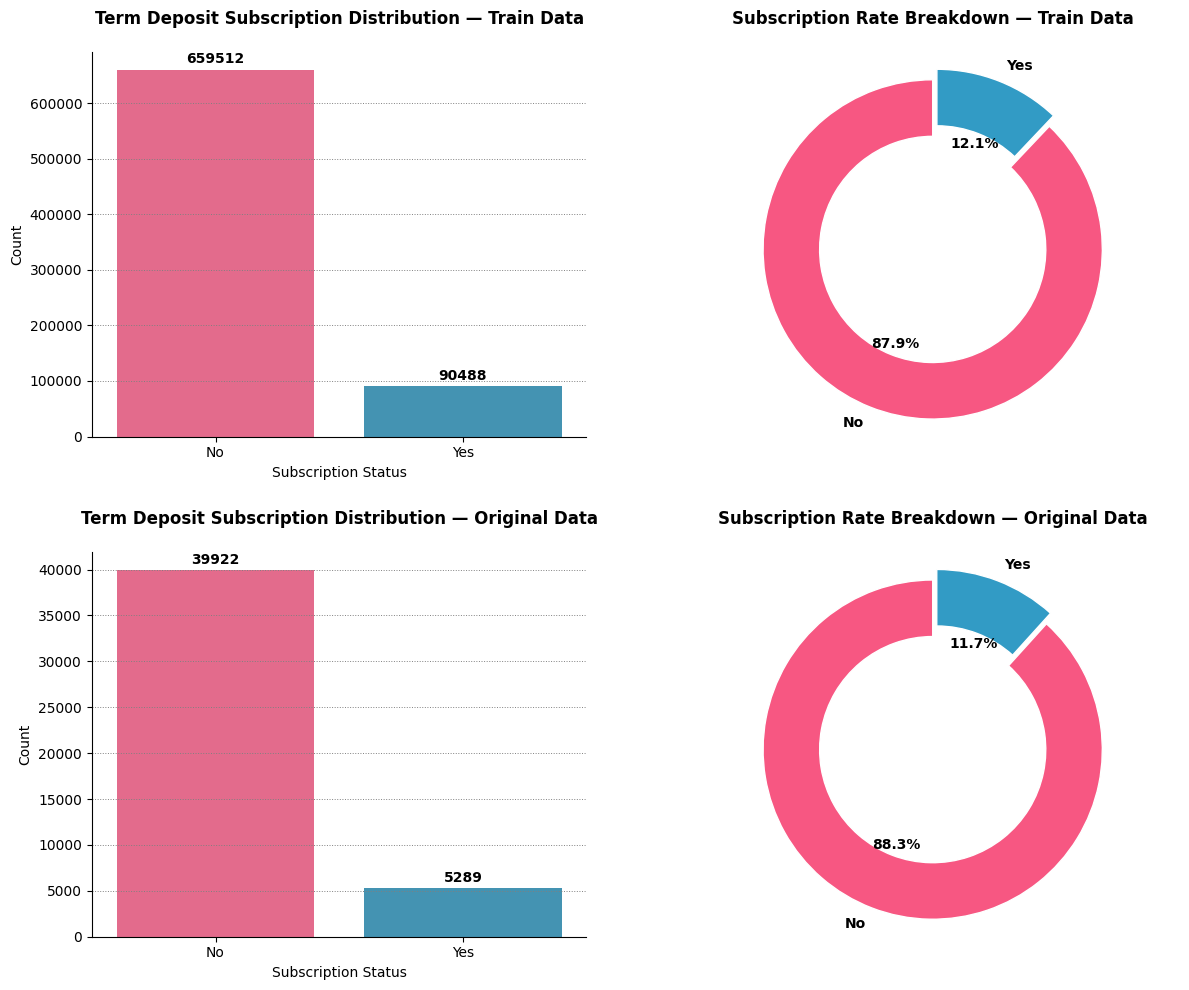

In [46]:
# Set target variable
target_variable = "y"
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
datasets = [("Train Data", df_train), ("Original Data", df_origin)]

for i, (title, data) in enumerate(datasets):
    ax = axes[i, 0]
    
    # Vertical barplot
    sns.countplot(x=target_variable, data=data, ax=ax, palette=color(n_colors=2))
    ax.set_title(f"Term Deposit Subscription Distribution — {title}", pad=20, weight="bold")
    ax.set_xlabel("Subscription Status")
    ax.set_ylabel("Count")
    ax.set_xticks([0, 1])
    ax.set_xticklabels(["No", "Yes"])
    ax.grid(axis="y", color="gray", linestyle=":", linewidth=0.7)

    sns.despine(ax=ax, top=True, right=True, left=False, bottom=False)

    # Add count labels on top of bars
    for p in ax.patches:
        height = p.get_height()
        x = p.get_x() + p.get_width() / 2
        ax.text(x, height + max(data[target_variable].value_counts()) * 0.01,
                f"{int(height)}",
                ha="center", va="bottom", fontsize=10, fontweight="bold", color="black")

    # Pie chart
    y_counts = data[target_variable].value_counts().sort_index()
    wedges, texts, autotexts = axes[i, 1].pie(
        y_counts,
        labels=["No", "Yes"],
        autopct="%1.1f%%",
        startangle=90,
        colors=color(n_colors=2),
        wedgeprops=dict(width=0.4, edgecolor="w"),
        radius=1.2,
        explode=(0, 0.08)
    )

    for text in texts + autotexts:
        text.set_fontsize(10)
        text.set_fontweight("bold")

    centre_circle = plt.Circle((0, 0), 0.70, fc="white")
    axes[i, 1].add_artist(centre_circle)
    axes[i, 1].set_title(f"Subscription Rate Breakdown — {title}", pad=20, weight="bold")
    axes[i, 1].axis("equal")

plt.tight_layout()
plt.subplots_adjust(hspace=0.3, wspace=0.2)
plt.show()

### **Distribution Analysis of Subscription Status**

| Dataset      | No (0)  | Yes (1) | Yes Rate  |
| ------------ | ------- | ------- | --------- |
| **Train**    | 659,512 | 90,488  | **12.1%** |
| **Original** | 39,922  | 5,289   | **11.7%** |

* **Majority class**: `'No'` (customers who did **not** subscribe to the term deposit)
* **Minority class**: `'Yes'` (subscribed)
* Both datasets show a **highly imbalanced target variable**, with only **\~12% positive class** (Yes).

## Numerical Feature Distributions

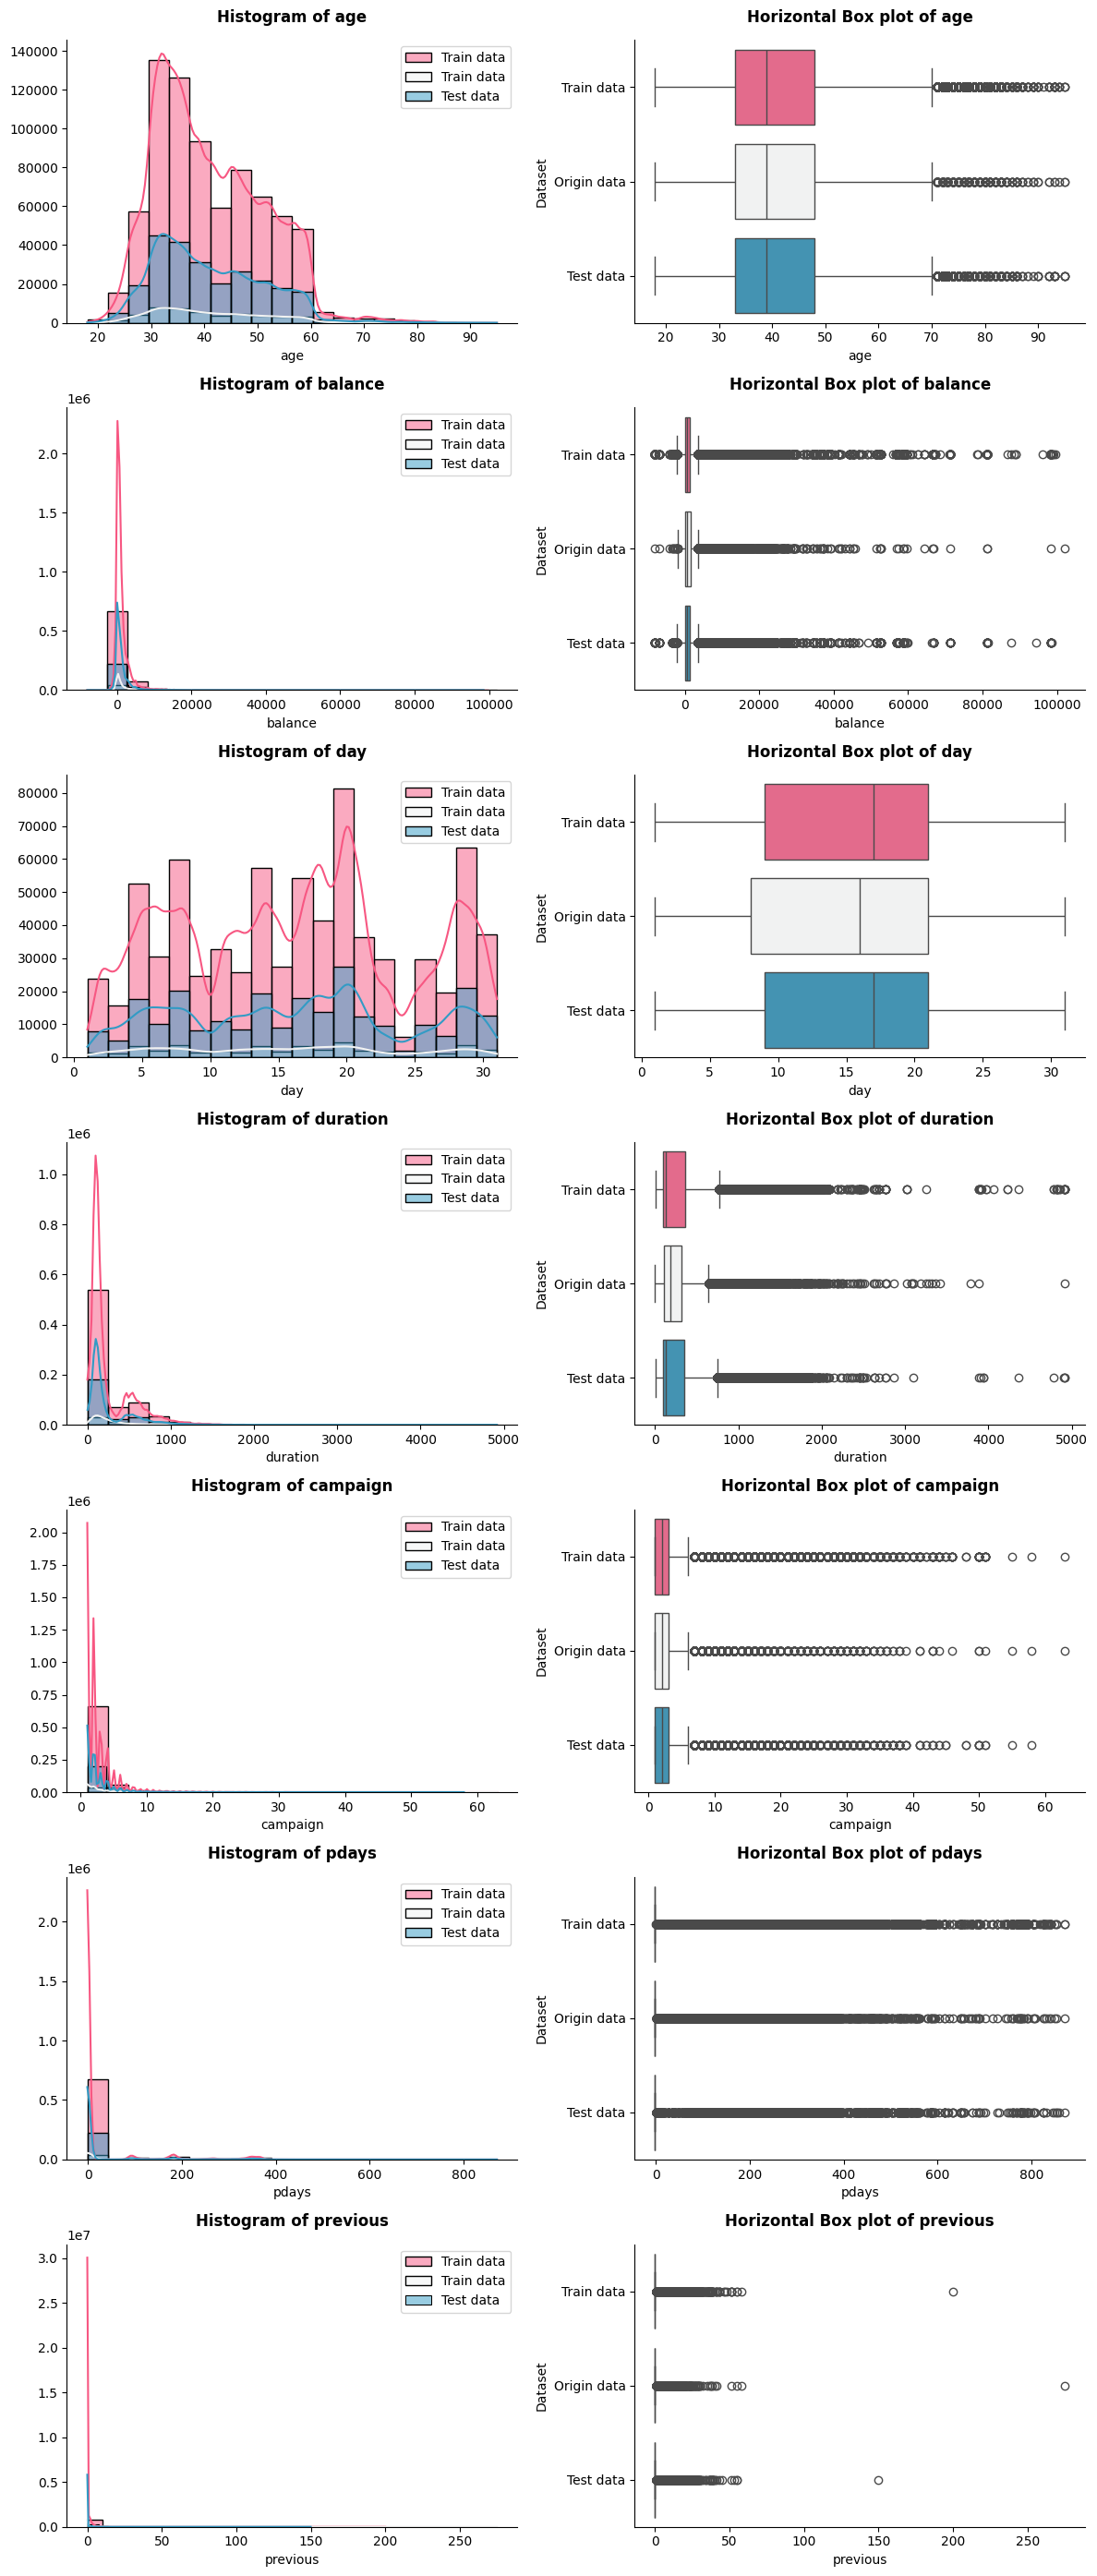

In [57]:
def plot_numerical_features(df_train, df_test, df_origin, num_features):
    colors = color(n_colors=3)
    n = len(num_features)

    fig, axes = plt.subplots(n, 2, figsize=(12, n * 4))
    axes = np.array(axes).reshape(n, 2)

    for i, feature in enumerate(num_features):
        sns.histplot(data=df_train[feature], color=colors[0], bins=20, kde=True, ax=axes[i, 0], label="Train data")
        sns.histplot(data=df_origin[feature], color=colors[1], bins=20, kde=True, ax=axes[i, 0], label="Train data")
        sns.histplot(data=df_test[feature], color=colors[2], bins=20, kde=True, ax=axes[i, 0], label="Test data")
        axes[i, 0].set_title(f"Histogram of {feature}", pad=14, weight="bold")
        axes[i, 0].legend()
        axes[i, 0].set_ylabel("")
        # axes[i, 0].grid(color="gray", linestyle=":", linewidth=0.7)
        # axes[i, 0].axvline(df_train[feature].median(), color="green", linestyle="--", label="Median Train")
        # axes[i, 0].axvline(df_origin[feature].median(), color="red", linestyle="--", label="Median Origin")
        # axes[i, 0].axvline(df_test[feature].median(), color="orange", linestyle="--", label="Median Test")
        sns.despine(left=False, bottom=False, ax=axes[i, 0])

        df_plot = pd.concat([
            pd.DataFrame({"Dataset": "Train data", feature: df_train[feature]}),
            pd.DataFrame({"Dataset": "Origin data", feature: df_origin[feature]}),
            pd.DataFrame({"Dataset": "Test data", feature: df_test[feature]})
        ]).reset_index(drop=True)

        sns.boxplot(
            data=df_plot,
            x=feature,
            y="Dataset",
            palette=colors,
            orient="h",
            ax=axes[i, 1]
        )
        axes[i, 1].set_title(f"Horizontal Box plot of {feature}", pad=14, weight="bold")
        sns.despine(left=False, bottom=False, ax=axes[i, 1])

    plt.tight_layout()
    plt.show()

plot_numerical_features(df_train = df_train, df_test = df_test, df_origin = df_origin, num_features=num_features)

In [55]:
def check_skewness(data, dataset_name, numerical_features = num_features, highlight=True, sort=True):
    skewness_dict = {}
    skew_feature = []
    for feature in numerical_features:
        skew = data[feature].skew(skipna=True)
        skewness_dict[feature] = skew

    skew_df = pd.DataFrame.from_dict(skewness_dict, orient="index", columns=["Skewness"])
    if sort:
        skew_df = skew_df.reindex(skew_df["Skewness"].abs().sort_values(ascending=False).index)
    else:
        pass
    
    print(f"\n🔍 Skewness for {dataset_name}:")
    print("-"*70)
    print(f"{'Feature':<30} | {'Skewness':<9} | {'Remark'}")
    print("-"*70)
    for feature, row in skew_df.iterrows():
        skew = row["Skewness"]
        abs_skew = abs(skew)
        if abs_skew > 1:
            remark = "Highly skewed"
            color = "\033[91m"  
        elif abs_skew > 0.5:
            remark = "Moderately skewed"
            color = "\033[93m"  
        else:
            remark = "Approximately symmetric"
            color = ""
        endc = "\033[0m" if color else ""
        if highlight and color:
            print(f"{color}{feature:<30} | {skew:>+9.4f} | {remark}{endc}")
            skew_feature.append(feature)
        else:
            print(f"{feature:<30} | {skew:>+9.4f} | {remark}")
    print("-"*70)
    return skew_feature, skew_df

skew_feature_origin, skew_origin_df = check_skewness(df_origin, "Original Data")
skew_feature_train, skew_train_df = check_skewness(df_train, "Train Data")
skew_feature_test, skew_test_df = check_skewness(df_test, "Test Data")


🔍 Skewness for Original Data:
----------------------------------------------------------------------
Feature                        | Skewness  | Remark
----------------------------------------------------------------------
previous                       |  +41.8465 | Highly skewed
balance                        |   +8.3603 | Highly skewed
campaign                       |   +4.8987 | Highly skewed
duration                       |   +3.1443 | Highly skewed
pdays                          |   +2.6157 | Highly skewed
age                            |   +0.6848 | Moderately skewed
day                            |   +0.0931 | Approximately symmetric
----------------------------------------------------------------------

🔍 Skewness for Train Data:
----------------------------------------------------------------------
Feature                        | Skewness  | Remark
----------------------------------------------------------------------
previous                       |  +13.7499 | Highly ske

### Insights on Numerical Feature Distributions

**Distribution Consistency Across Datasets**

- **Histograms** and **box plots** of numerical features (`previous`, `balance`, `campaign`, `pdays`, `duration`, `age`, `day`) indicate that the **train**, **test**, and **original** datasets have **largely similar distributions**, although some variables like `balance` and `previous` show **minor differences in their tails**.

| Feature    | Distribution Match Level | Notes                                                        |
| ---------- | ------------------------ | ------------------------------------------------------------ |
| `age`      | High                   | Very consistent                                              |
| `day`      | High                   | Nearly identical across datasets                             |
| `balance`  | Medium                | Slight differences detected → consider scaling/log-transform |
| `duration` | High                   | Although skewed, the shape is consistent                     |
| `campaign` | High                   | Distribution is consistent                                   |
| `pdays`    | High                   | Majority of values are -1 in all datasets                    |
| `previous` | Medium                | Slight mismatch in the distribution tail (outliers)          |

- This consistency suggests that the synthetic data generation process closely mirrors the original data, minimizing the risk of distributional shift and enhancing model generalization.

**Shape and Spread of Distributions**

– **Histograms** show that several numerical features (e.g., `balance`, `campaign`, `pdays`, `previous`) have long right tails, indicating the presence of extreme values or rare cases.
– **Box plots** provide additional perspective on distribution density, highlighting the presence of outliers and confirming that the location and spread of these variables remain generally consistent across the **train**, **test**, and **original** datasets.

**Skewness Analysis**

- Certain features like `previous`, `balance`, `campaign`, `pdays `, `duration`, `age` exhibit notable skewness (|skewness| > 0.5), meaning their distributions are **asymmetric** and may benefit from transformations such as **log** or **Box-Cox** normalization or **Yeo-Johnson**.
- Addressing skewness is important since it can impact the performance of some machine learning algorithms, making preprocessing a necessary step.

**Feature-Specific Observations**

* **Age, Balance, Campaign:**

  * `age` is moderately right-skewed, with most clients between 33 and 48 years old.
  * `balance` exhibits a highly skewed distribution with a large number of clients near zero or in debt, and a few outliers with extremely high balances.
  * `campaign` shows a long-tailed distribution, where most customers were contacted once or twice, but some received over 60 calls, suggesting rare but aggressive outreach cases.

* **Duration, Pdays, Previous:**

  * `duration` is heavily skewed due to a small number of very long calls; most calls last under 500 seconds.
  * `pdays` has a large spike at `-1`, indicating the majority of customers were never previously contacted.
  * `previous` is dominated by zeros, showing that most clients had no prior campaign interaction, but a few extreme values suggest persistent contact in specific cases.

## Correlation Analysis of Numerical Features

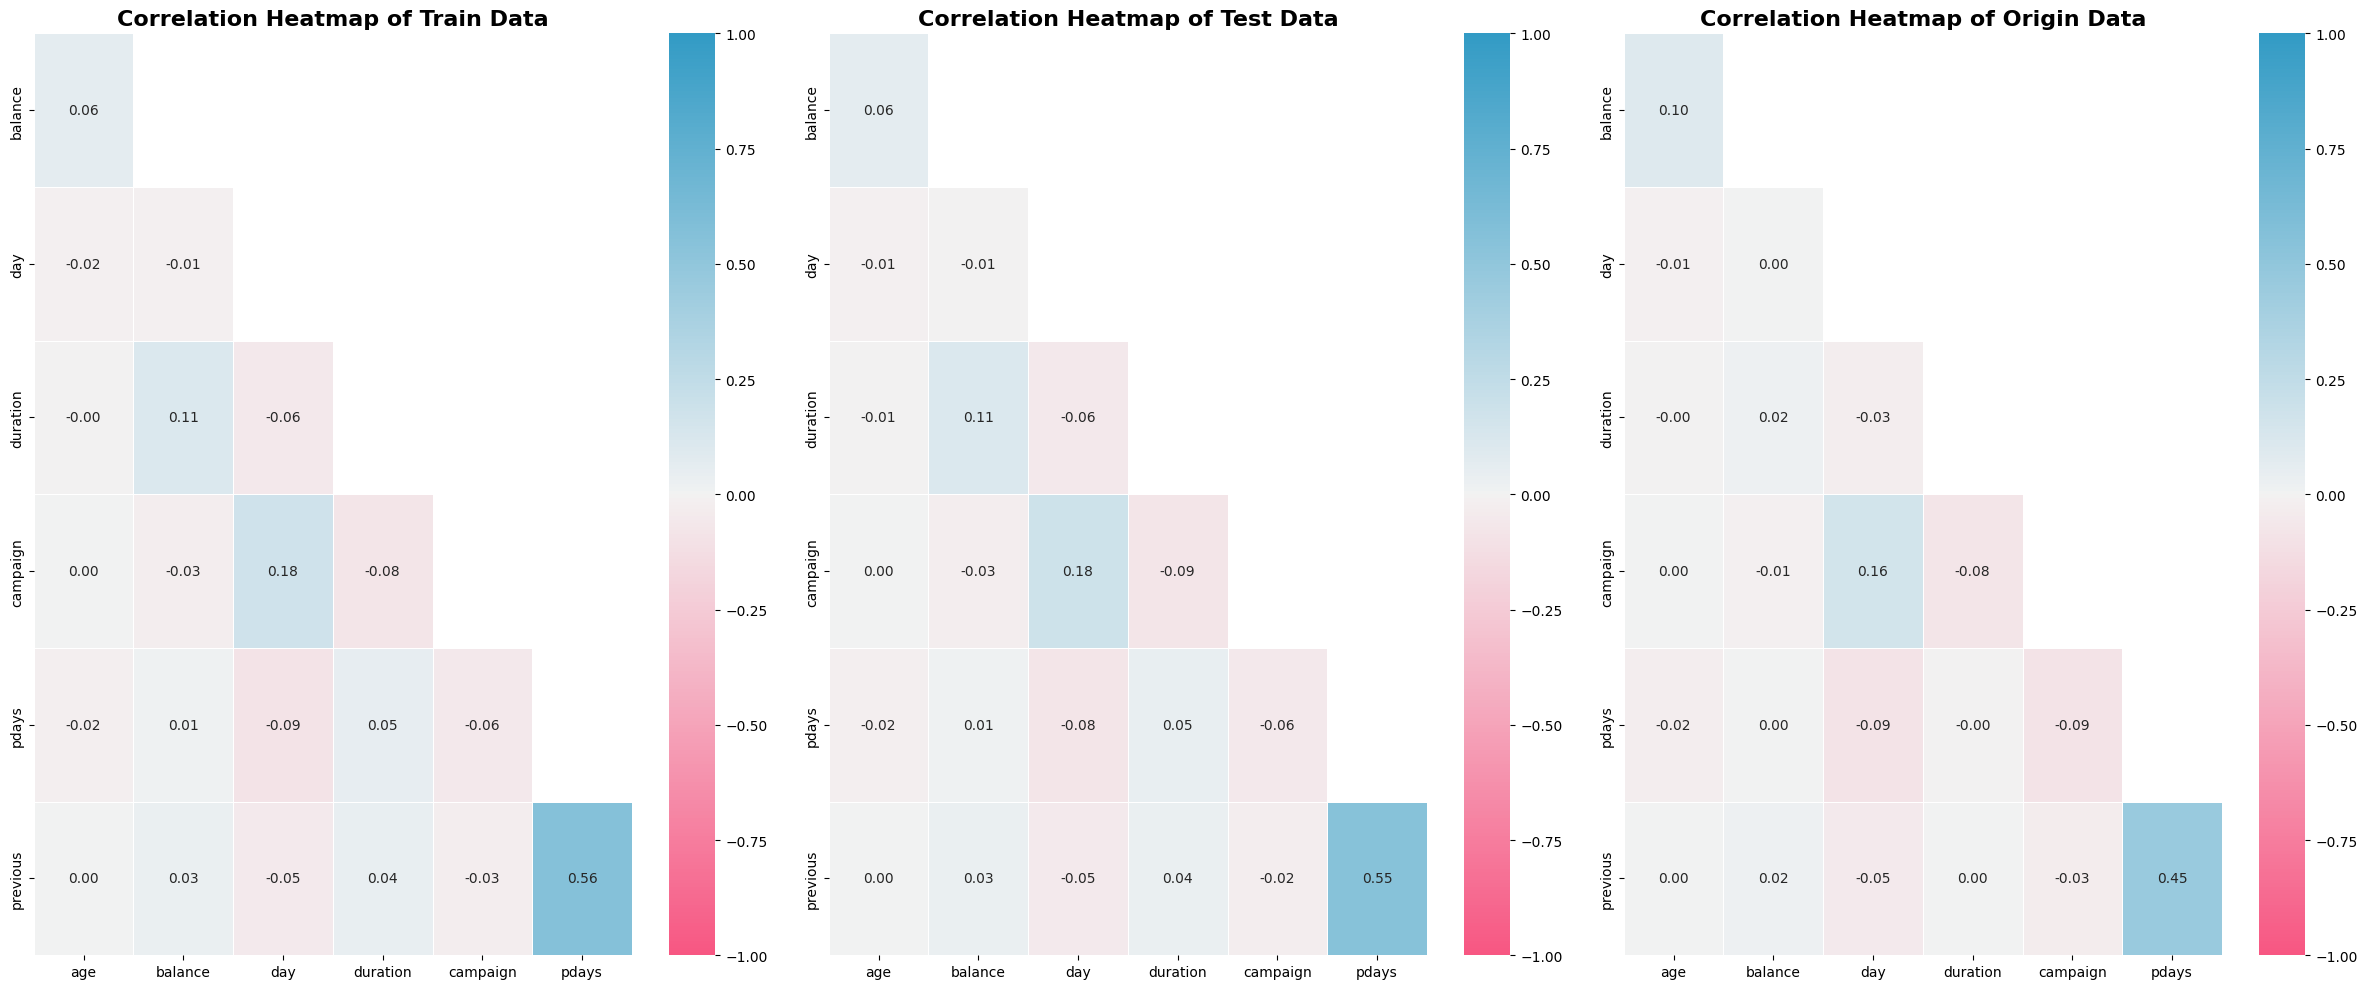

In [59]:
def plot_correlation(df_train, df_origin, df_test, origin_name="Origin Data", train_name="Train Data", test_name="Test Data"):
    corr_train = df_train.corr(numeric_only=True)
    corr_origin = df_origin.corr(numeric_only=True)
    corr_test = df_test.corr(numeric_only=True)

    mask_train = np.triu(np.ones_like(corr_train, dtype=bool))
    adjusted_mask_train = mask_train[1:, :-1]
    adjusted_cereal_corr_train = corr_train.iloc[1:, :-1]

    mask_origin = np.triu(np.ones_like(corr_origin, dtype=bool))
    adjusted_mask_origin = mask_origin[1:, :-1]
    adjusted_cereal_corr_origin = corr_origin.iloc[1:, :-1]

    mask_test = np.triu(np.ones_like(corr_test, dtype=bool))
    adjusted_mask_test = mask_test[1:, :-1]
    adjusted_cereal_corr_test = corr_test.iloc[1:, :-1]

    cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
    fig, ax = plt.subplots(1, 3, figsize=(24, 10))

    sns.heatmap(data=adjusted_cereal_corr_train, mask=adjusted_mask_train,
                annot=True, fmt=".2f", cmap=cmap,
                vmin=-1, vmax=1, linecolor="white", linewidths=0.5, ax=ax[0])
    ax[0].set_title(f"Correlation Heatmap of {train_name}", fontsize=16, weight="bold")

    sns.heatmap(data=adjusted_cereal_corr_test, mask=adjusted_mask_test,
                annot=True, fmt=".2f", cmap=cmap,
                vmin=-1, vmax=1, linecolor="white", linewidths=0.5, ax=ax[1])
    ax[1].set_title(f"Correlation Heatmap of {test_name}", fontsize=16, weight="bold")

    sns.heatmap(data=adjusted_cereal_corr_origin, mask=adjusted_mask_origin,
                annot=True, fmt=".2f", cmap=cmap,
                vmin=-1, vmax=1, linecolor="white", linewidths=0.5, ax=ax[2])
    ax[2].set_title(f"Correlation Heatmap of {origin_name}", fontsize=16, weight="bold")

    plt.tight_layout()
    plt.show()

plot_correlation(df_train=df_train.drop(columns="y", axis=1),
                 df_origin=df_origin.drop(columns="y", axis=1),
                 df_test=df_test)

### Insights from Correlation Analysis of Numerical Features

**Observation on Correlation Heatmaps**

* The **correlation structure remains highly consistent across the Train, Test, and Original datasets**, indicating **no feature-level data drift**. This consistency reinforces the reliability of data generation or sampling, supporting robust model performance across different dataset splits.

* Most features exhibit **very weak or negligible correlations** (|r| < 0.1), suggesting that they capture distinct aspects of customer behavior. However, one notable relationship stands out:

  * `pdays` and `previous` show a **moderate positive correlation** (\~+0.55), consistently across all datasets. This implies that customers who were contacted more recently (`pdays` is closer to 0) tend to have been contacted more frequently in the past (`previous` > 0).

  * `campaign` has a **weak positive correlation** with `duration` (\~+0.18), possibly indicating that customers receiving more calls may have slightly longer average call durations — although the relationship is not strong enough to be conclusive.

  * All other feature pairs (`balance`, `age`, `day`) have correlations close to zero, confirming their statistical independence.

**Implication – Low Risk of Multicollinearity**

* Given the **lack of strong correlations** among most numerical variables, the risk of **multicollinearity is minimal**.
* This is favorable for models that assume low feature interdependence, such as:

  * **Logistic Regression**
  * **Linear Discriminant Analysis**
  * **Explainability methods** based on coefficient magnitude

**Summary Table**

| Feature Pair             | Correlation Strength      | Interpretation                                                |
| ------------------------ | ------------------------- | ------------------------------------------------------------- |
| `pdays` \~ `previous`    | Moderate (+0.45 to +0.56) | Recently contacted customers tend to have more prior contacts |
| `campaign` \~ `duration` | Weak (+0.16 to +0.18)     | Slight trend of longer calls with more contact attempts       |
| Others                   | Very weak / None          | No notable linear relationships                               |

**Conclusion**:
The absence of strong feature interdependencies ensures that the numerical features contribute **independent signals** to the model, improving interpretability and reducing the risk of coefficient instability in linear models.

## Categorical Feature Distributions

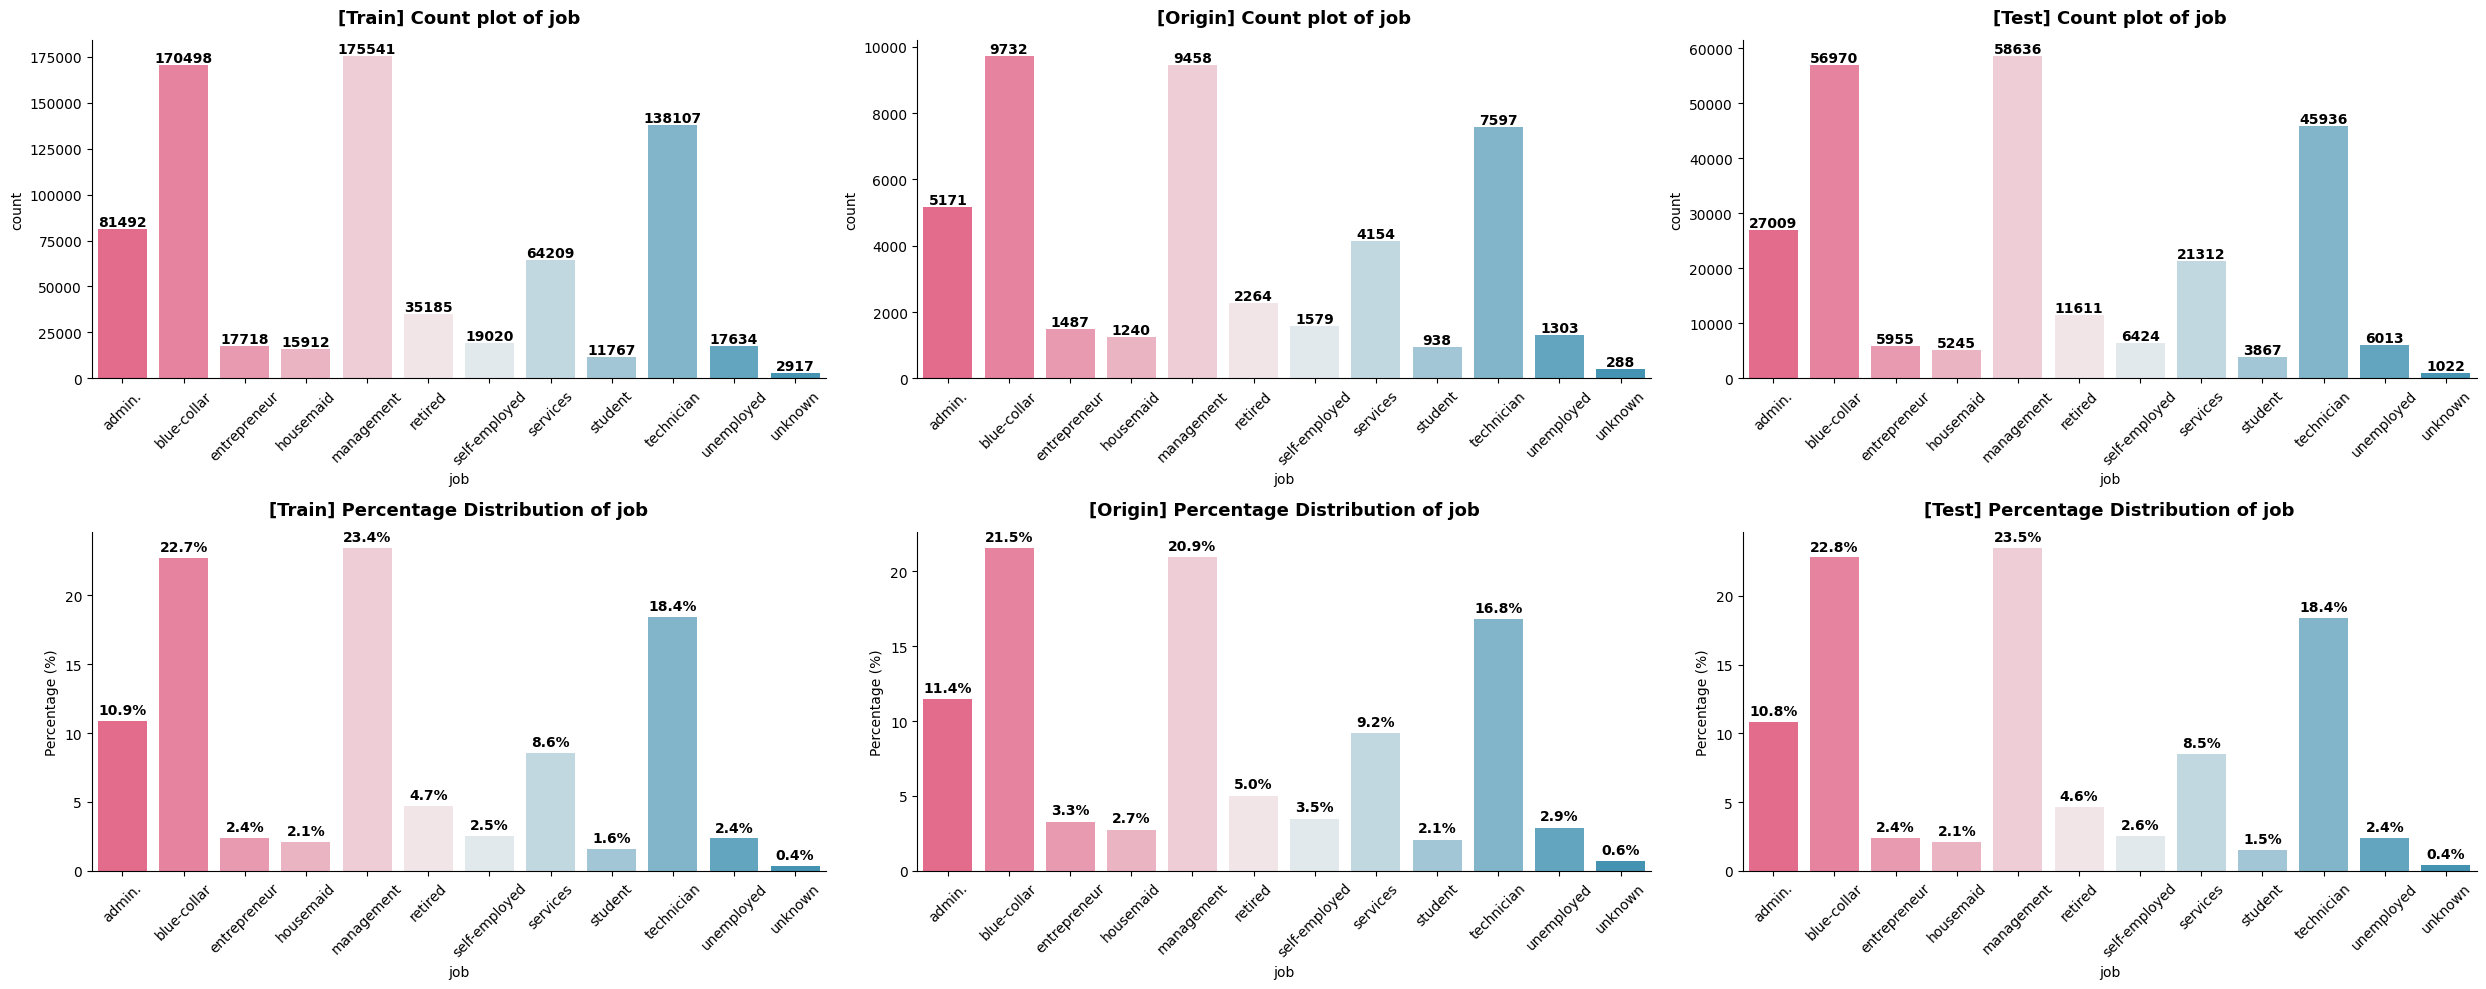

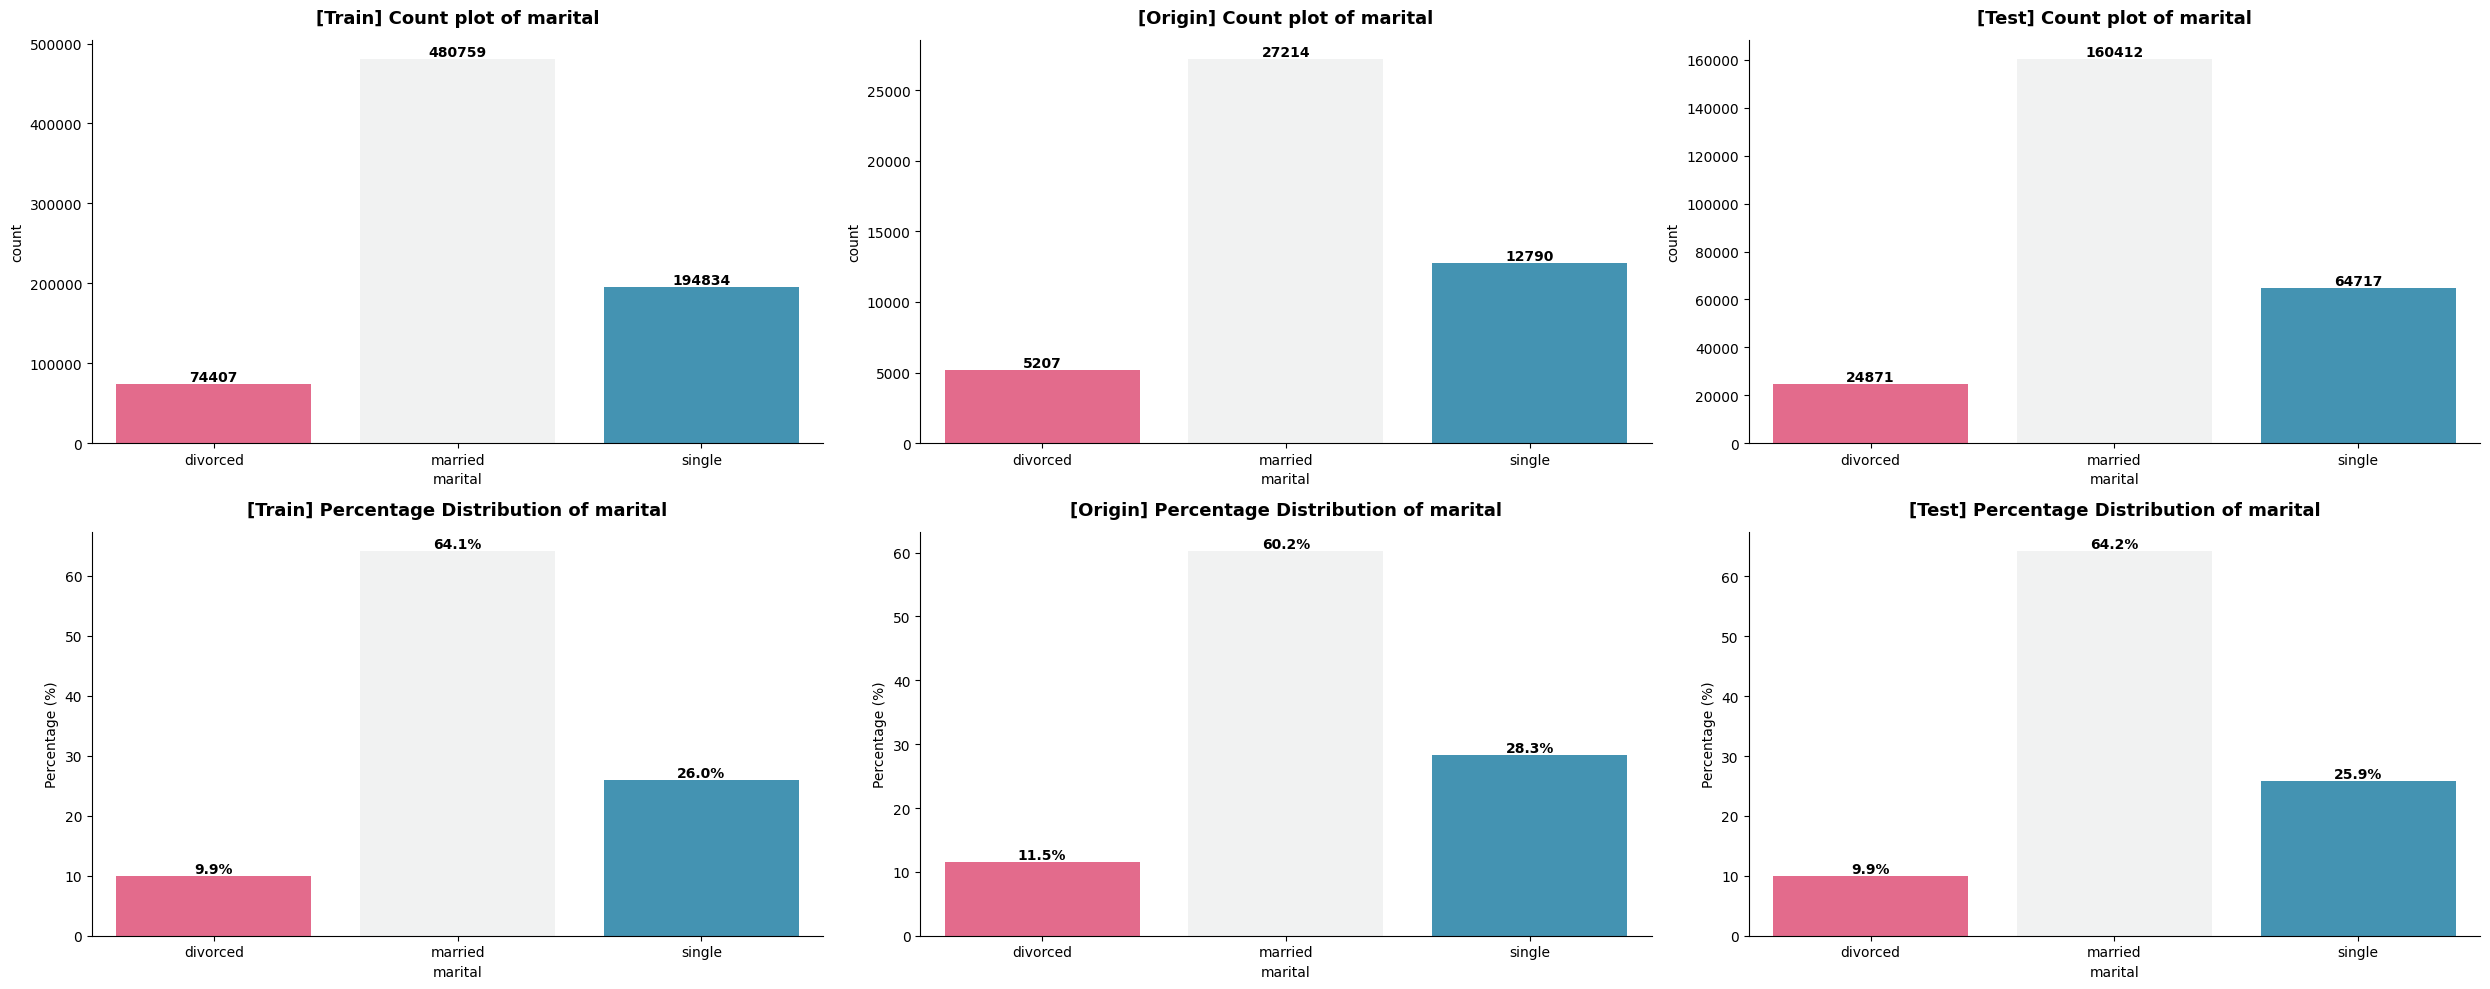

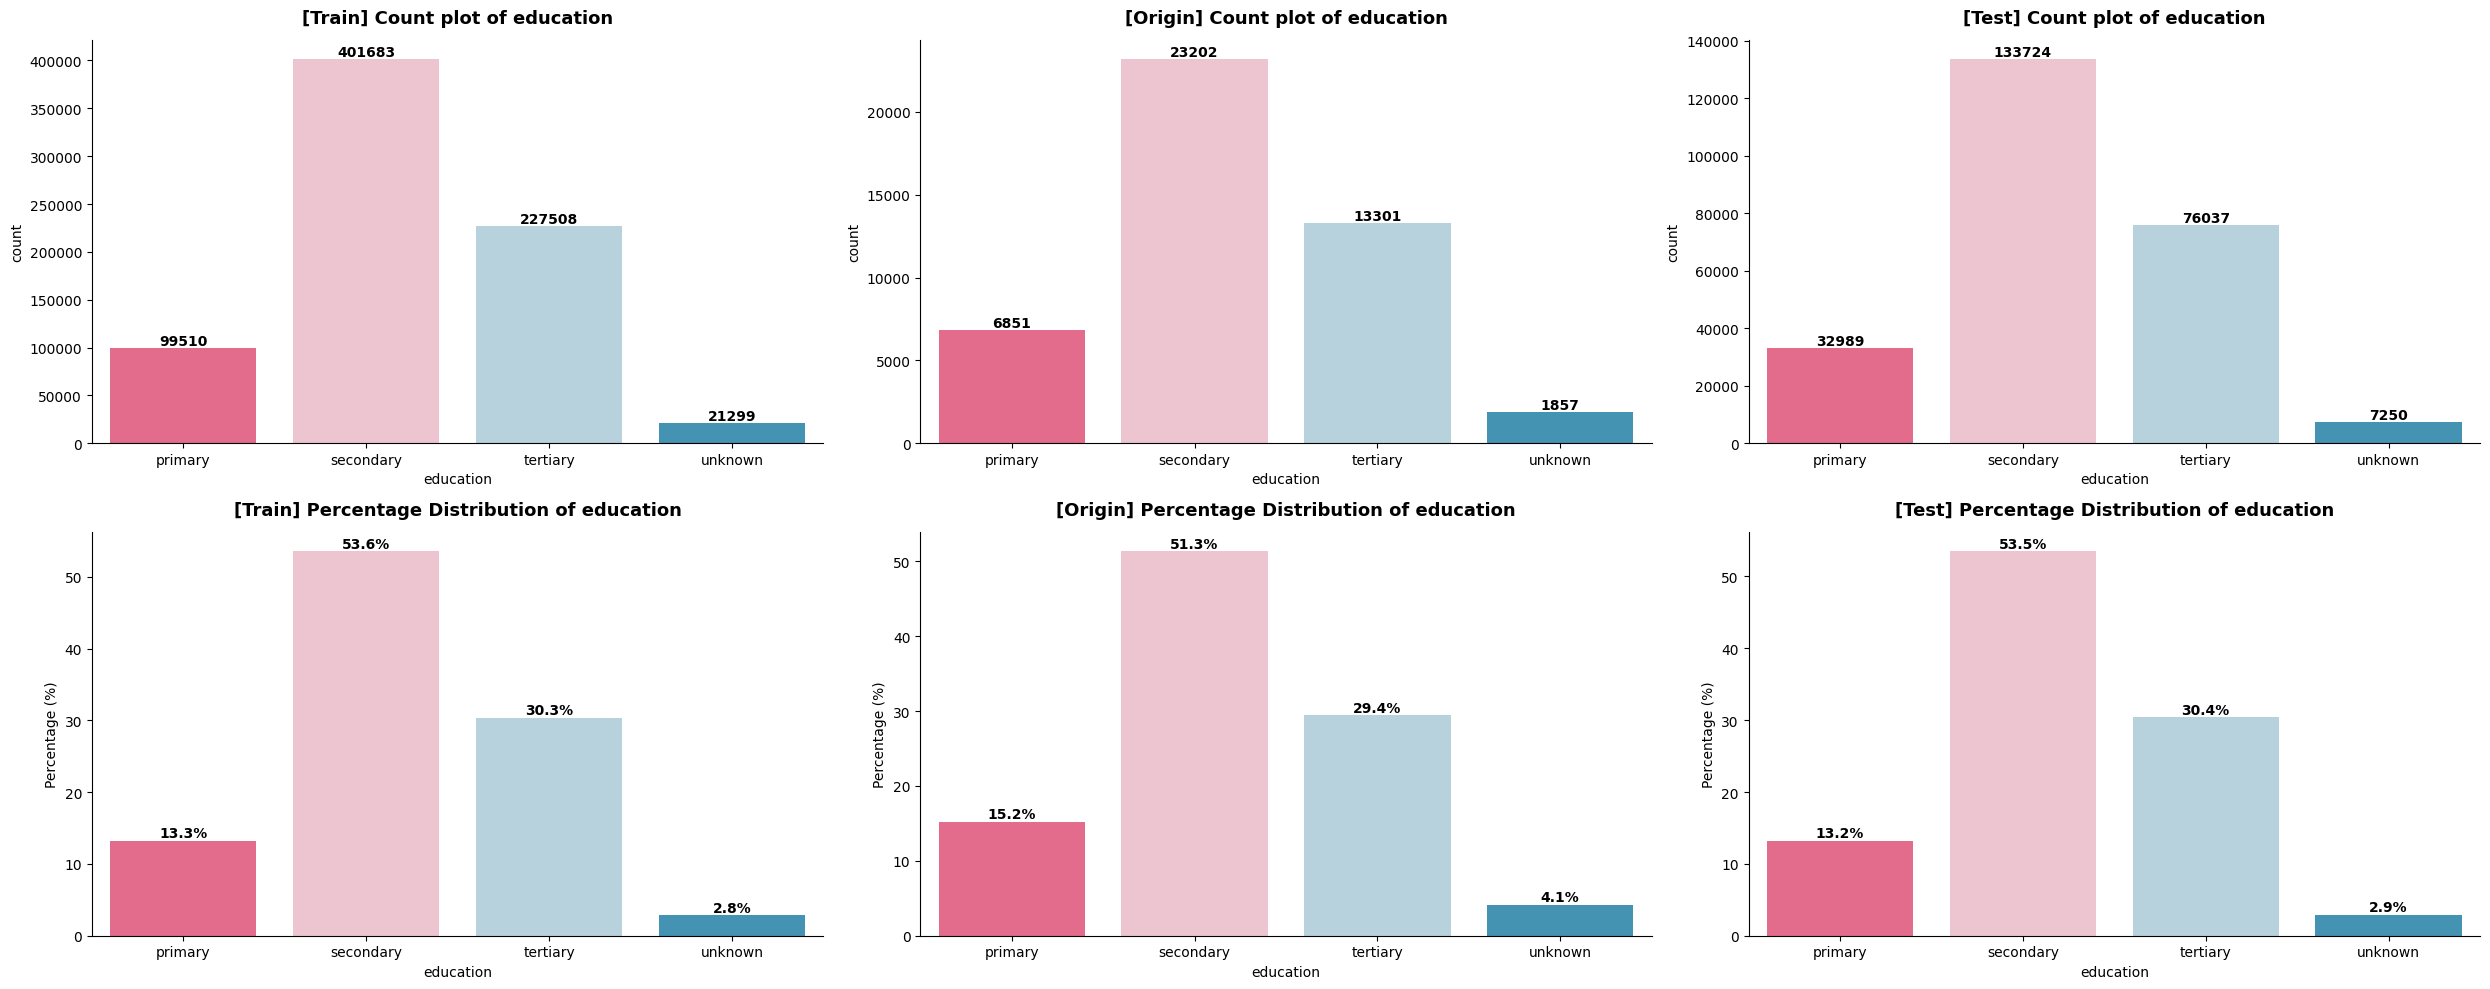

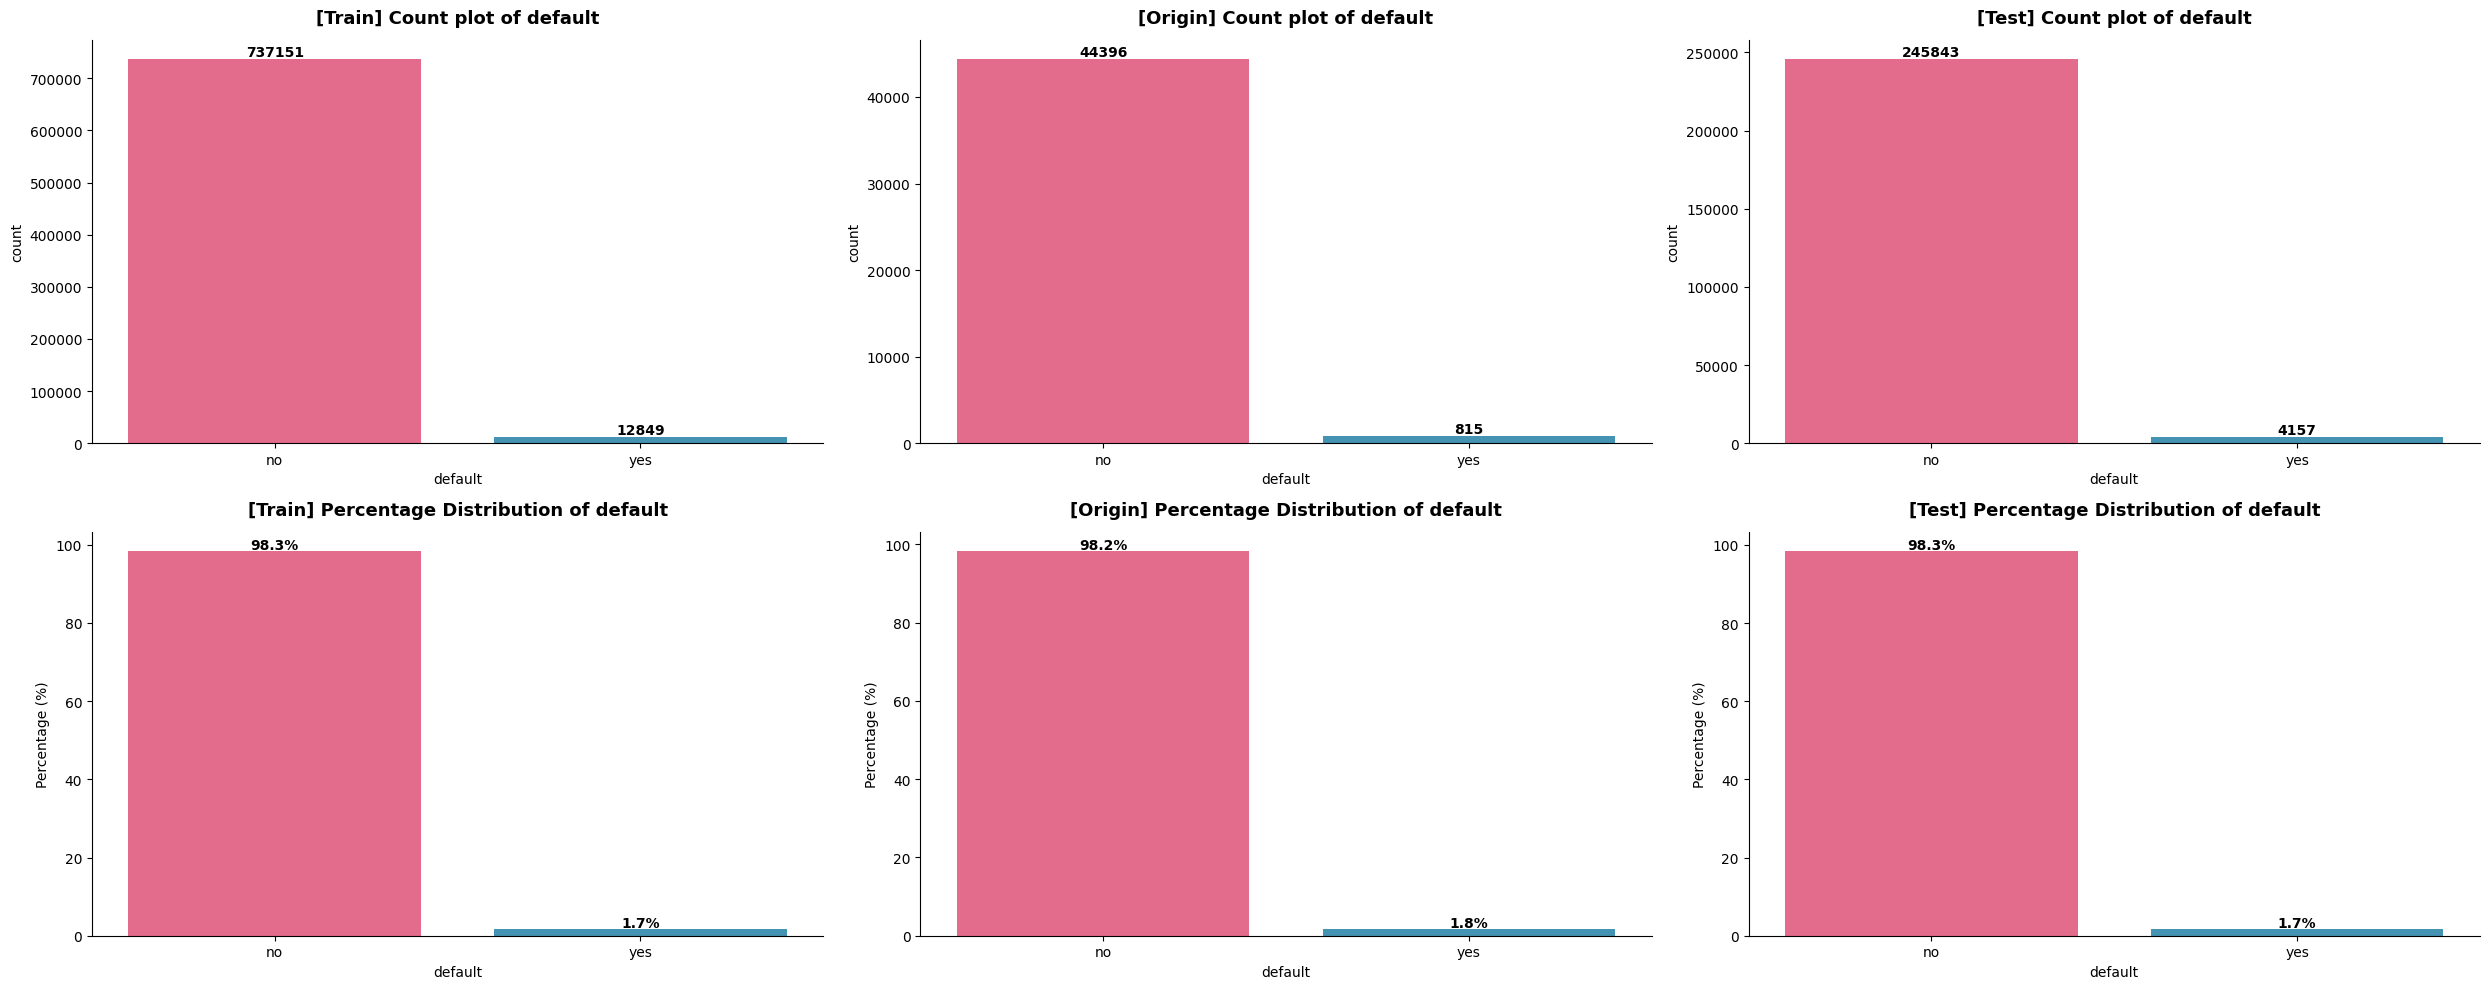

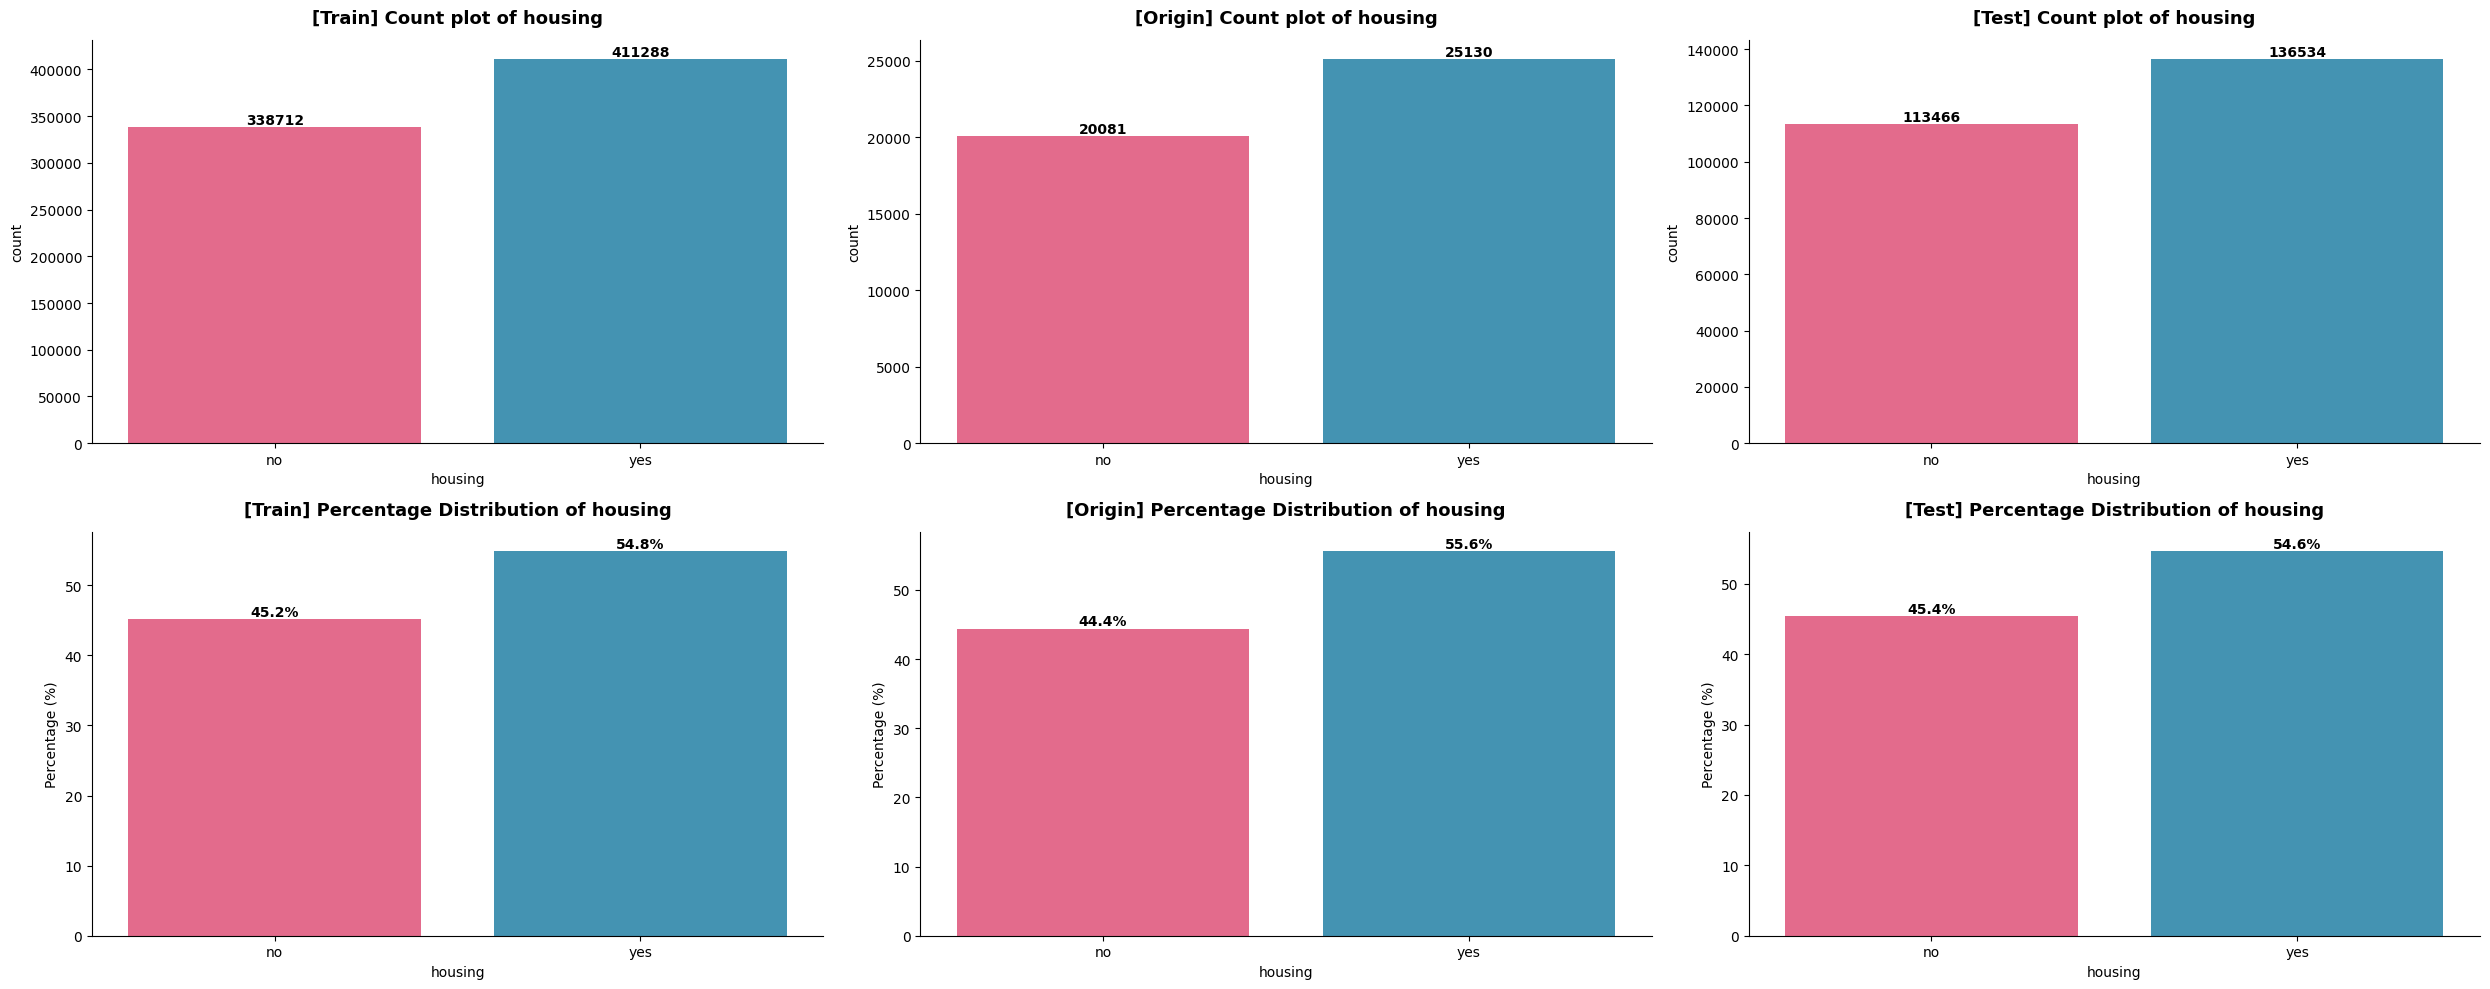

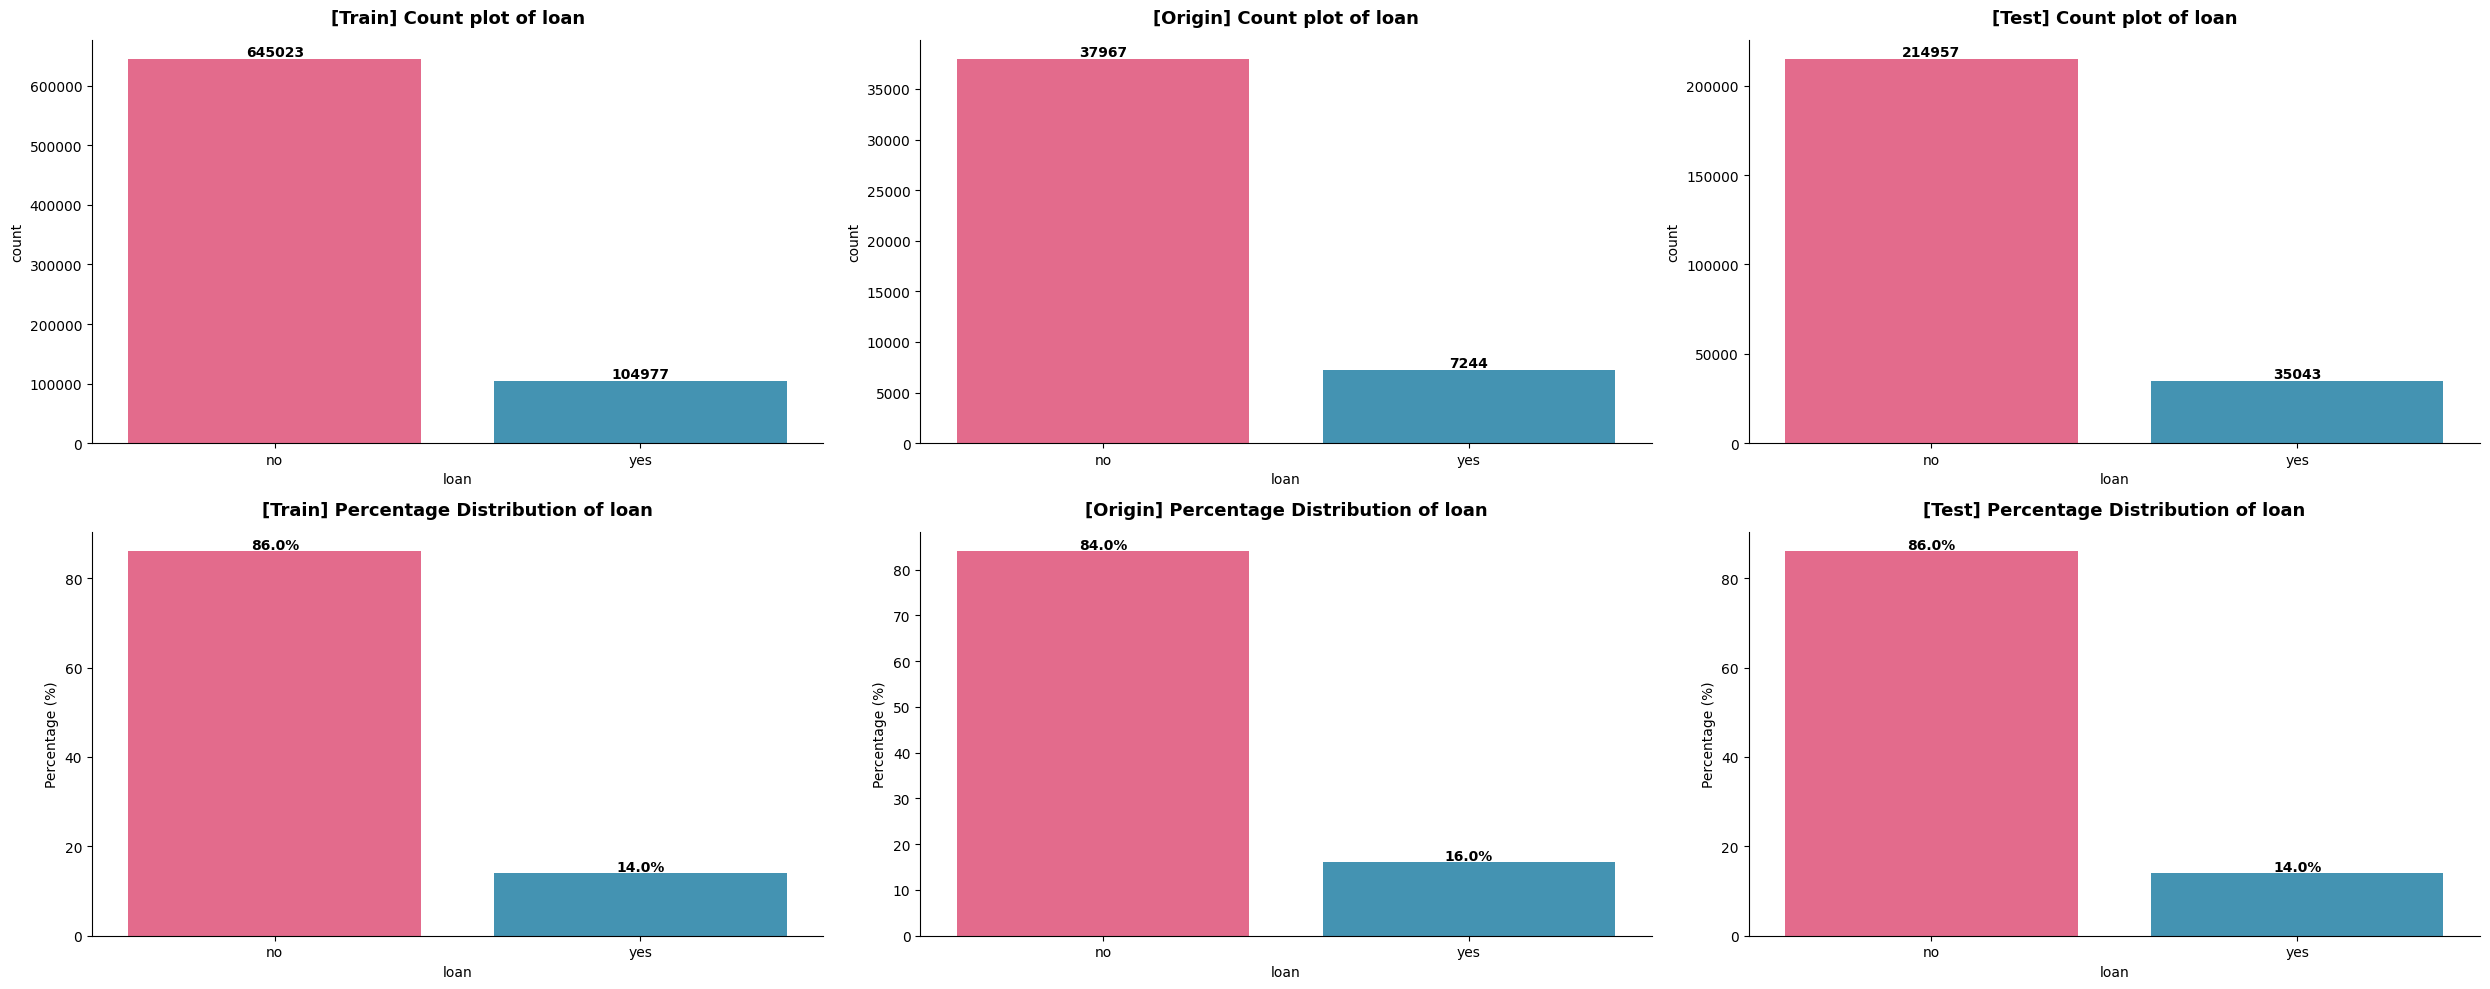

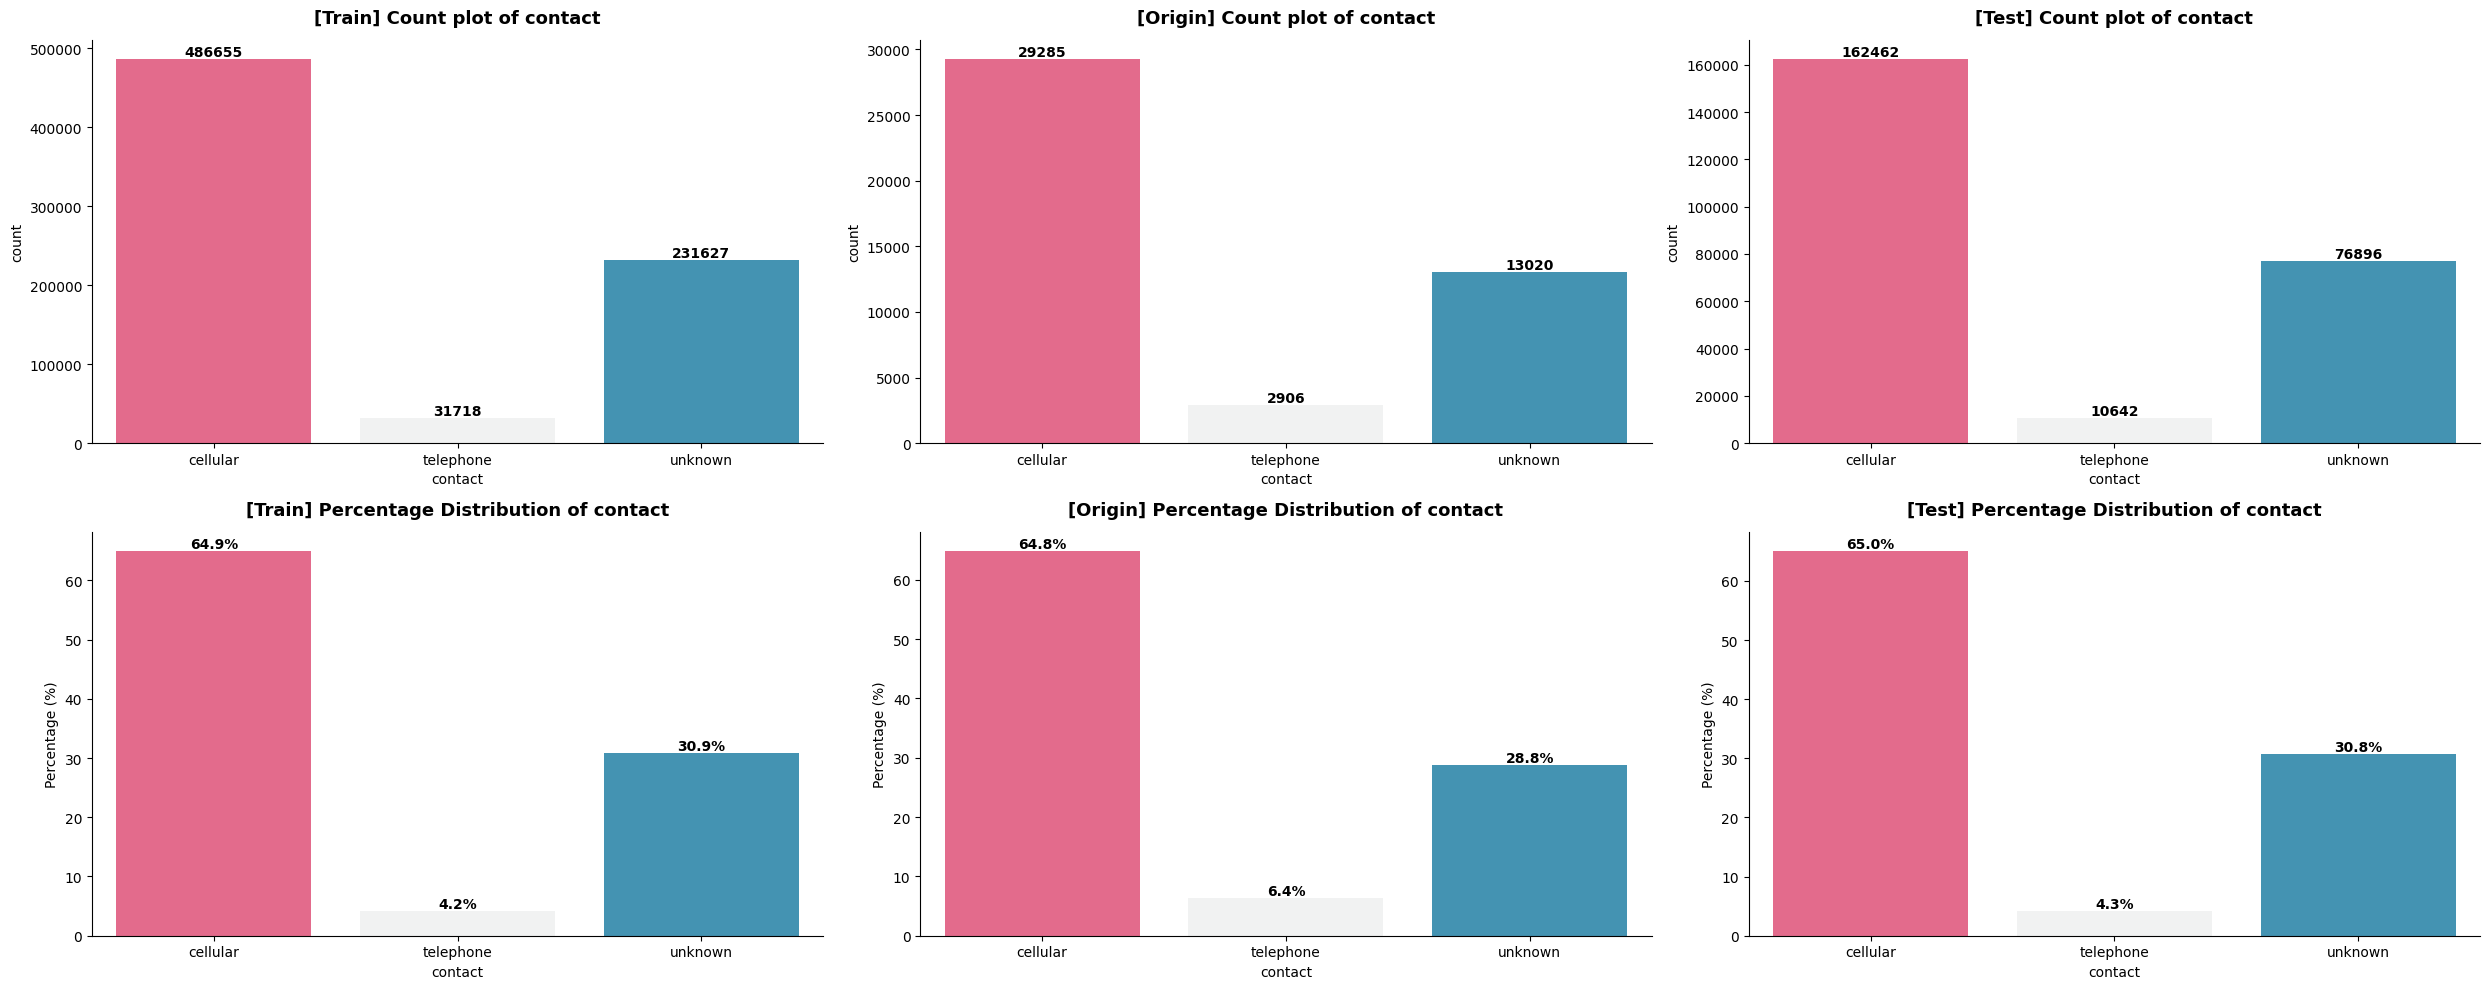

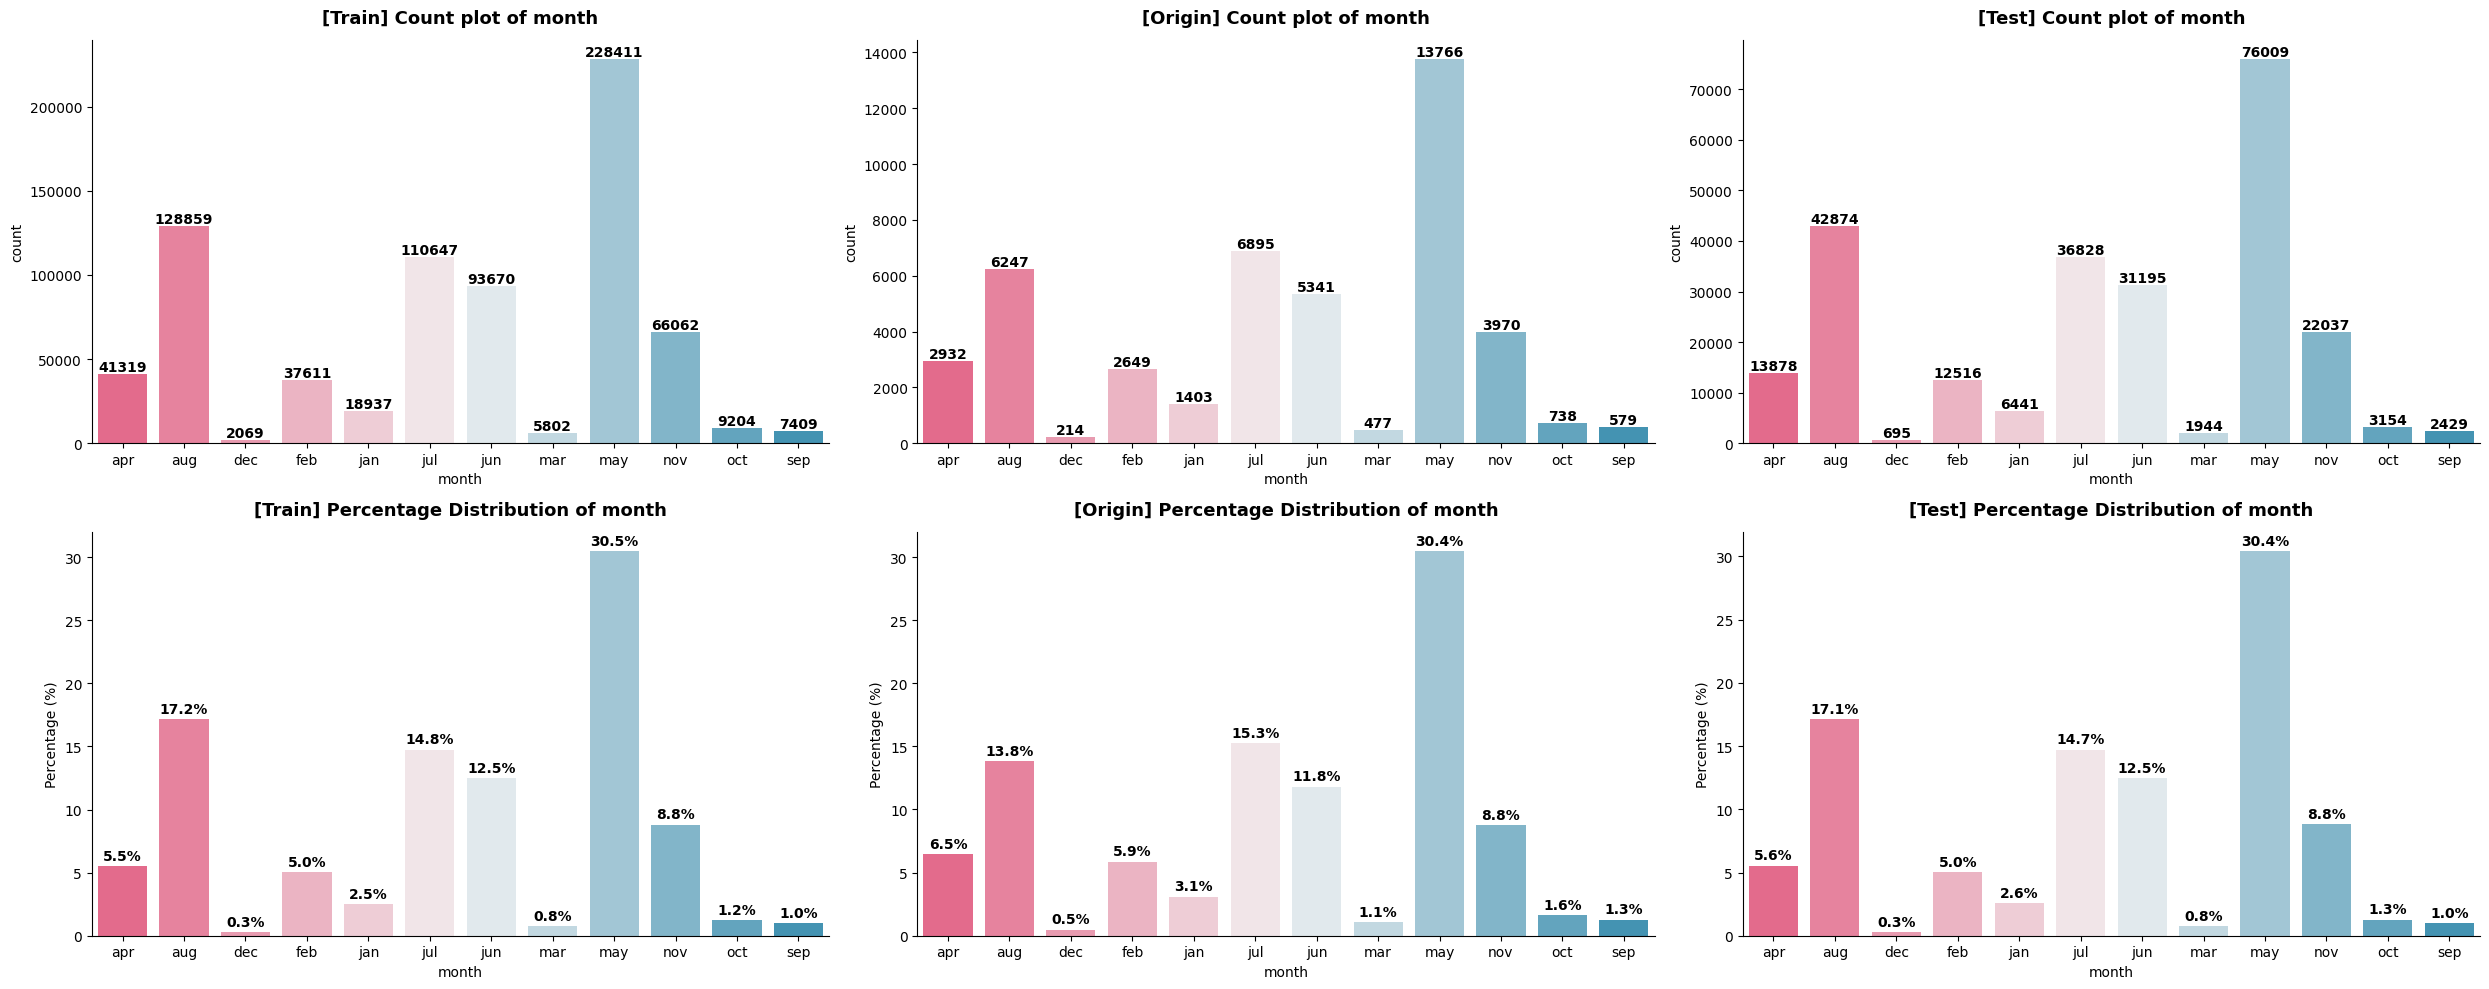

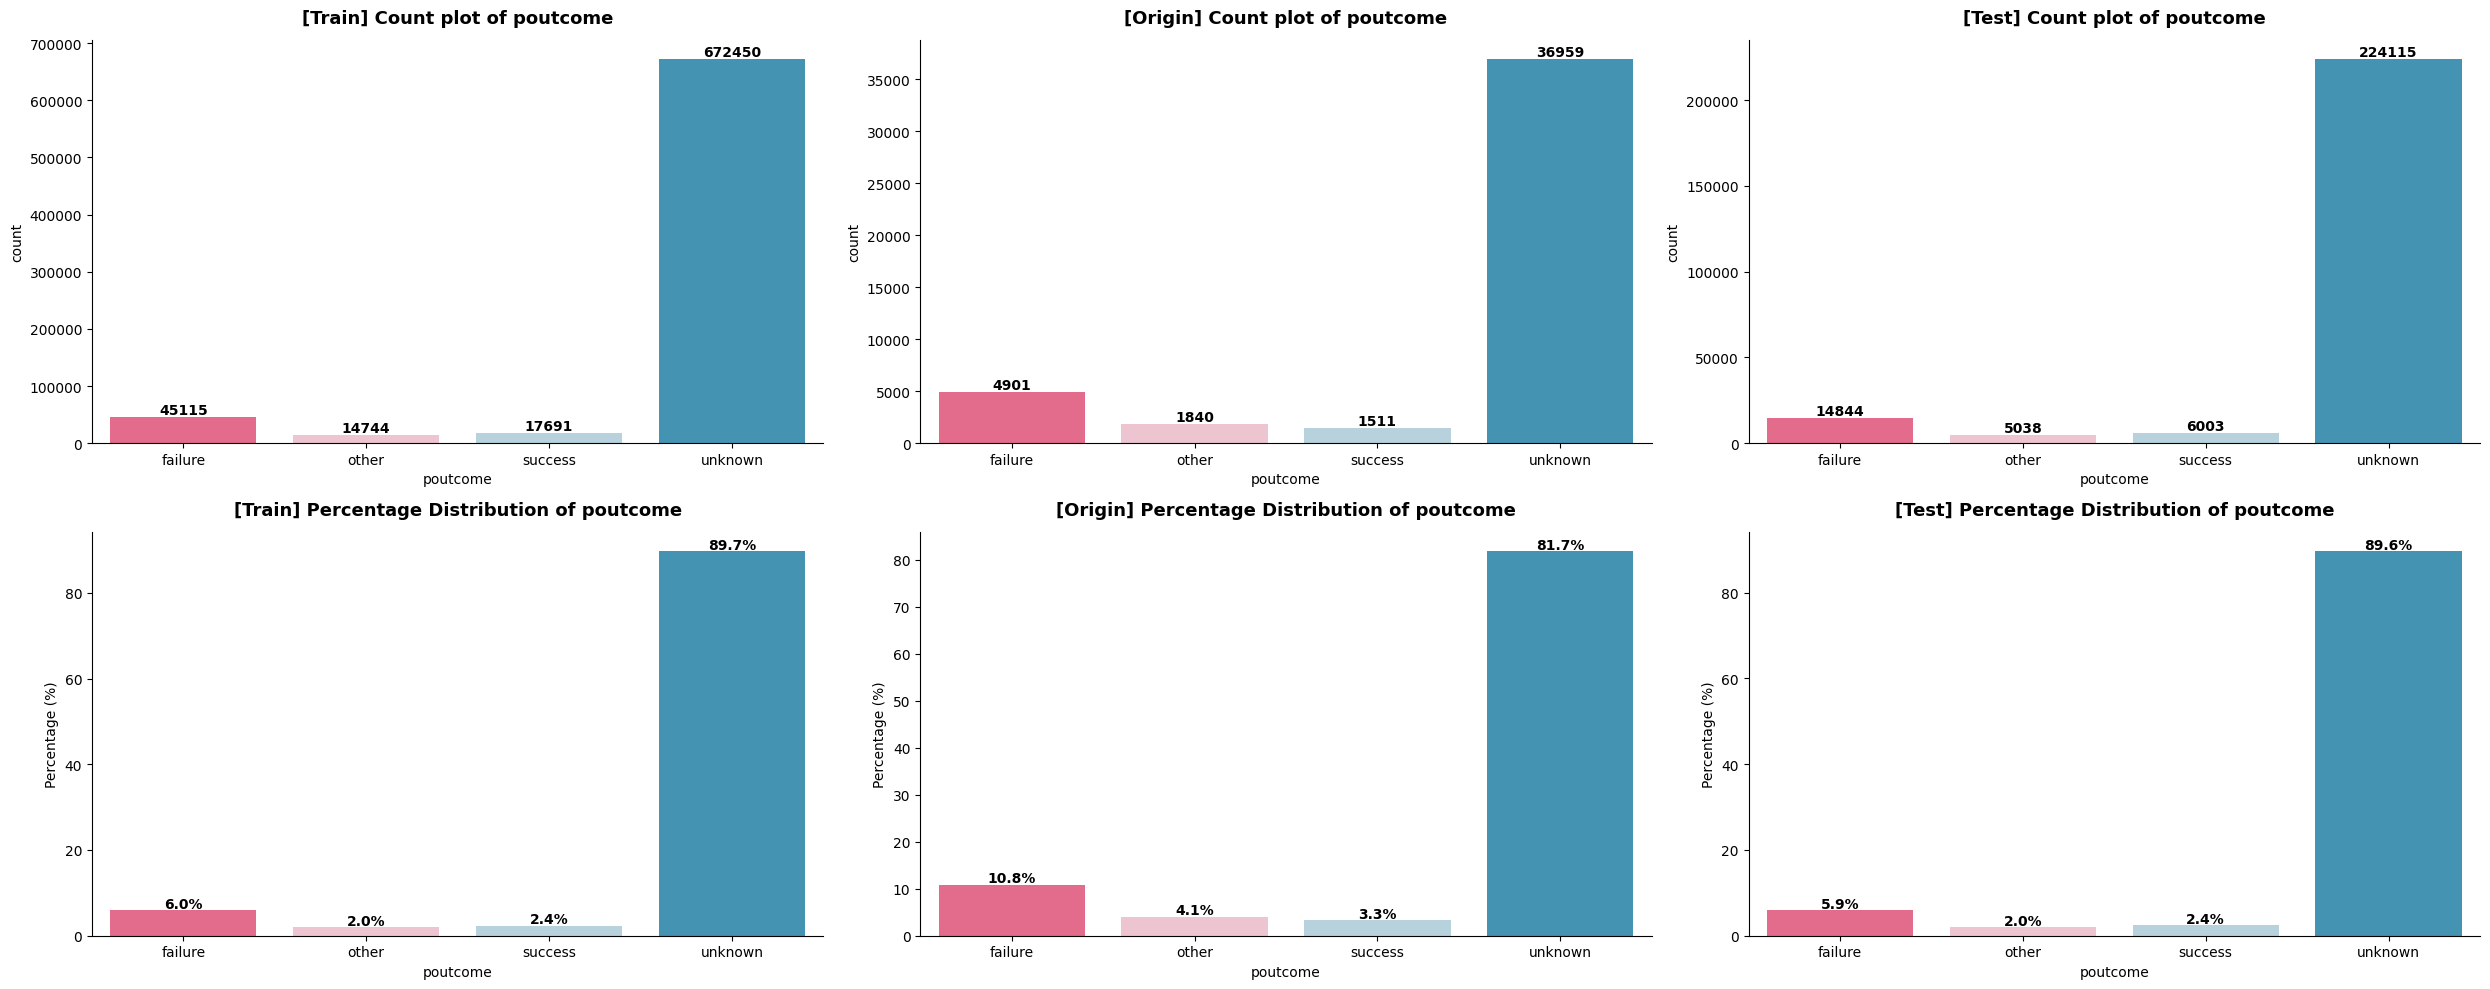

In [64]:
def plot_categorical_distribution(cat_features, df_train, df_test, df_origin, order=None):
    for feature in cat_features:
        fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(25, 10))

        # Determine order dynamically if not provided
        if order is None:
            unique_vals = sorted(df_train[feature].dropna().unique())
        else:
            unique_vals = order

        # COUNT PLOT – TRAIN
        sns.countplot(data=df_train, x=feature, ax=ax[0, 0],
                      palette=color(n_colors=len(unique_vals)), order=unique_vals)
        ax[0, 0].set_title(f"[Train] Count plot of {feature}", fontsize=13, pad=12, weight="bold")
        if feature == "job":
            ax[0, 0].set_xticklabels(ax[0, 0].get_xticklabels(), rotation=45)
        sns.despine(ax=ax[0, 0], left=False, bottom=False)
        for container in ax[0, 0].containers:
            ax[0, 0].bar_label(container, fmt='%d', label_type="edge", fontsize=10, weight="bold")

        # COUNT PLOT – ORIGIN
        sns.countplot(data=df_origin, x=feature, ax=ax[0, 1],
                      palette=color(n_colors=len(unique_vals)), order=unique_vals)
        ax[0, 1].set_title(f"[Origin] Count plot of {feature}", fontsize=13, pad=12, weight="bold")
        if feature == "job":
            ax[0, 1].set_xticklabels(ax[0, 0].get_xticklabels(), rotation=45)
        sns.despine(ax=ax[0, 1], left=False, bottom=False)
        for container in ax[0, 1].containers:
            ax[0, 1].bar_label(container, fmt='%d', label_type="edge", fontsize=10, weight="bold")

        # COUNT PLOT – TEST
        sns.countplot(data=df_test, x=feature, ax=ax[0, 2], 
                      palette=color(n_colors=len(unique_vals)), order=unique_vals)
        ax[0, 2].set_title(f"[Test] Count plot of {feature}", fontsize=13, pad=12, weight="bold")
        if feature == "job":
            ax[0, 2].set_xticklabels(ax[0, 2].get_xticklabels(), rotation=45)
        sns.despine(ax=ax[0, 2], left=False, bottom=False)
        for container in ax[0, 2].containers:
            ax[0, 2].bar_label(container, fmt='%d', label_type="edge", fontsize=10, weight="bold")

        # PERCENTAGE BARPLOT – TRAIN
        train_percent = df_train[feature].value_counts(normalize=True) * 100
        train_percent = train_percent.reindex(unique_vals).fillna(0)
        sns.barplot(x=train_percent.index, y=train_percent.values, ax=ax[1, 0],
                    palette=color(n_colors=len(unique_vals)))
        ax[1, 0].set_title(f"[Train] Percentage Distribution of {feature}", fontsize=13, pad=12, weight="bold")
        ax[1, 0].set_ylabel("Percentage (%)")
        ax[1, 0].set_xlabel(feature)
        if feature == "job":
            ax[1, 0].set_xticklabels(ax[1, 0].get_xticklabels(), rotation=45)
        sns.despine(ax=ax[1, 0], left=False, bottom=False)
        for i, v in enumerate(train_percent.values):
            ax[1, 0].text(i, v + 0.5, f"{v:.1f}%", ha='center', fontsize=10, weight="bold")

        # PERCENTAGE BARPLOT – ORIGIN
        origin_percent = df_origin[feature].value_counts(normalize=True) * 100
        origin_percent = origin_percent.reindex(unique_vals).fillna(0)
        sns.barplot(x=origin_percent.index, y=origin_percent.values, ax=ax[1, 1],
                    palette=color(n_colors=len(unique_vals)))
        ax[1, 1].set_title(f"[Origin] Percentage Distribution of {feature}", fontsize=13, pad=12, weight="bold")
        ax[1, 1].set_ylabel("Percentage (%)")
        ax[1, 1].set_xlabel(feature)
        if feature == "job":
            ax[1, 1].set_xticklabels(ax[1, 1].get_xticklabels(), rotation=45)
        sns.despine(ax=ax[1, 1], left=False, bottom=False)
        for i, v in enumerate(origin_percent.values):
            ax[1, 1].text(i, v + 0.5, f"{v:.1f}%", ha='center', fontsize=10, weight="bold")

        # PERCENTAGE BARPLOT – TEST
        test_percent = df_test[feature].value_counts(normalize=True) * 100
        test_percent = test_percent.reindex(unique_vals).fillna(0)
        sns.barplot(x=test_percent.index, y=test_percent.values, ax=ax[1, 2],
                    palette=color(n_colors=len(unique_vals)))
        ax[1, 2].set_title(f"[Test] Percentage Distribution of {feature}", fontsize=13, pad=12, weight="bold")
        ax[1, 2].set_ylabel("Percentage (%)")
        ax[1, 2].set_xlabel(feature)
        if feature == "job":
            ax[1, 2].set_xticklabels(ax[1, 2].get_xticklabels(), rotation=45)
        sns.despine(ax=ax[1, 2], left=False, bottom=False)
        for i, v in enumerate(test_percent.values):
            ax[1, 2].text(i, v + 0.5, f"{v:.1f}%", ha='center', fontsize=10, weight="bold")

        plt.tight_layout()
        plt.show()

plot_categorical_distribution(cat_features=cat_features, df_train = df_train, df_test = df_test, df_origin=df_origin)

In [63]:
def top_ratio(df_test = df_test, df_train = df_train, df_origin=df_origin, cat_features = cat_features):
    dataset_names = ["Train", "Test", "Origin"]
    datasets = [df_train, df_origin, df_test]
    for i, (data, name) in enumerate(zip(datasets, dataset_names)):
        print(f"{name} Data")
        flagged = False
        for feature in cat_features:
            freq = data[feature].value_counts(normalize=True)
            top_ratio = freq.iloc[0]
            if top_ratio > 0.99:
                flagged = True
                print(f"⚠️  {feature}: {top_ratio:.1%} là '{freq.index[0]}'")
        if not flagged:
            print("✅ No feature has a category that makes up more than 99% of its values.")
        print("*" * 50)
top_ratio()

Train Data
✅ No feature has a category that makes up more than 99% of its values.
**************************************************
Test Data
✅ No feature has a category that makes up more than 99% of its values.
**************************************************
Origin Data
✅ No feature has a category that makes up more than 99% of its values.
**************************************************


### Overall Consistency in Categorical Feature Distributions

* The **count plots and percentage distribution charts** of categorical variables across the **Train, Test, and Original datasets** show a **high degree of consistency**.
* There are **no noticeable signs of distributional shift** or **sampling bias** across the datasets.

**Detailed Observations:**

* The **proportions of category values (labels)** for each feature remain within acceptable margins of variation across datasets.
  For example:

  * `job`: categories like `blue-collar`, `management`, and `technician` maintain similar proportions across all three datasets.
  * `marital`: the `married` group consistently makes up around **60–64%**.
  * Other features such as `education`, `default`, `housing`, `loan`, `contact`, `month`, and `poutcome` also retain a stable distribution structure.

**Conclusion:**

> The categorical variables exhibit a **high degree of distributional similarity across Train, Test, and Original datasets**, indicating **well-preserved sampling consistency**.
> This enhances **model robustness** and reduces the risk of performance degradation due to dataset mismatch.

## Bivariate Analysis

In [65]:
df_train_combined = pd.concat([df_train, df_origin], axis=0, ignore_index=True)
# Re-check duplicate

datasets = {
    "Training Data": df_train_combined,
    "Test Data": df_test
}

duplicate_summary = {}
for name, data in datasets.items():
    check_duplicates_report(data, name)
    duplicate_summary[name] = {
        "duplicates": data.duplicated().sum(),
        "total_rows": len(data)
    }
    print()

🔍 Training Data Duplicate Analysis
✅ No duplicates found in 795,211 rows

🔍 Test Data Duplicate Analysis
✅ No duplicates found in 250,000 rows



,y,Count,Mean,Median,Std
1,1,95777,41.212765,38.000000,12.754656
0,0,699434,40.887815,39.000000,9.713841


🔎 D’Agostino and Pearson Normality Test for 'age' across 'y' groups

 Group: 0 (n = 699434)
  Statistic : 29906.790
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 1 (n = 95777)
  Statistic : 8550.297
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'age' by 'y'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 34820543361.0
p-value     : 3.50790870183308e-88

✅ Result: Statistically significant difference between the two groups (Reject H₀).
 Interpretation: Group '0' has a higher median 'age' than Group '1'.


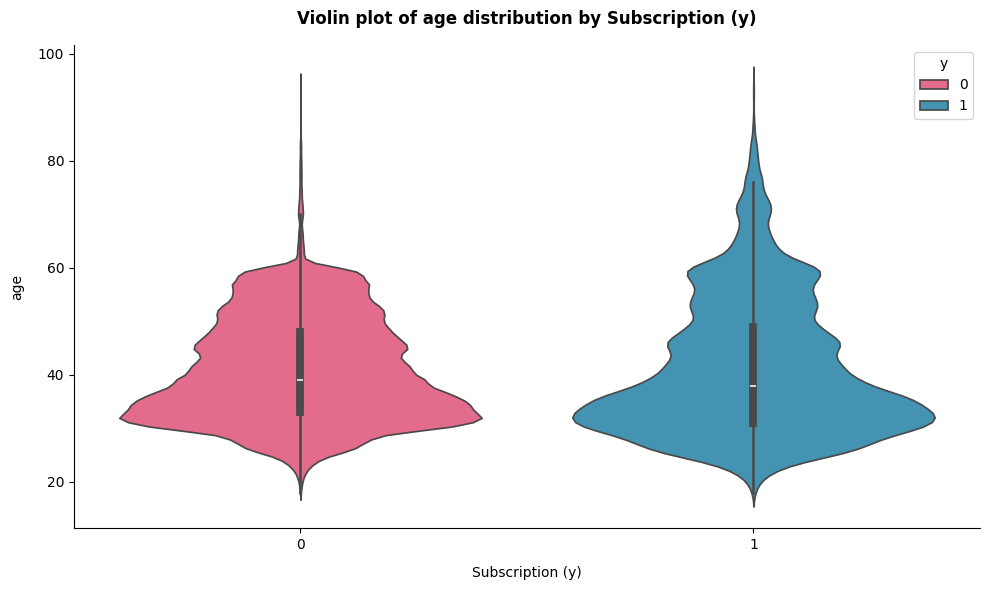

,y,Count,Mean,Median,Std
1,1,95777,2123.447289,1101.000000,3712.462176
0,0,699434,1088.398361,579.000000,2685.033522


🔎 D’Agostino and Pearson Normality Test for 'balance' across 'y' groups

 Group: 0 (n = 699434)
  Statistic : 1255391.976
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 1 (n = 95777)
  Statistic : 141723.668
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'balance' by 'y'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 22056113590.5
p-value     : 0.0

✅ Result: Statistically significant difference between the two groups (Reject H₀).
 Interpretation: Group '1' has a higher median 'balance' than Group '0'.


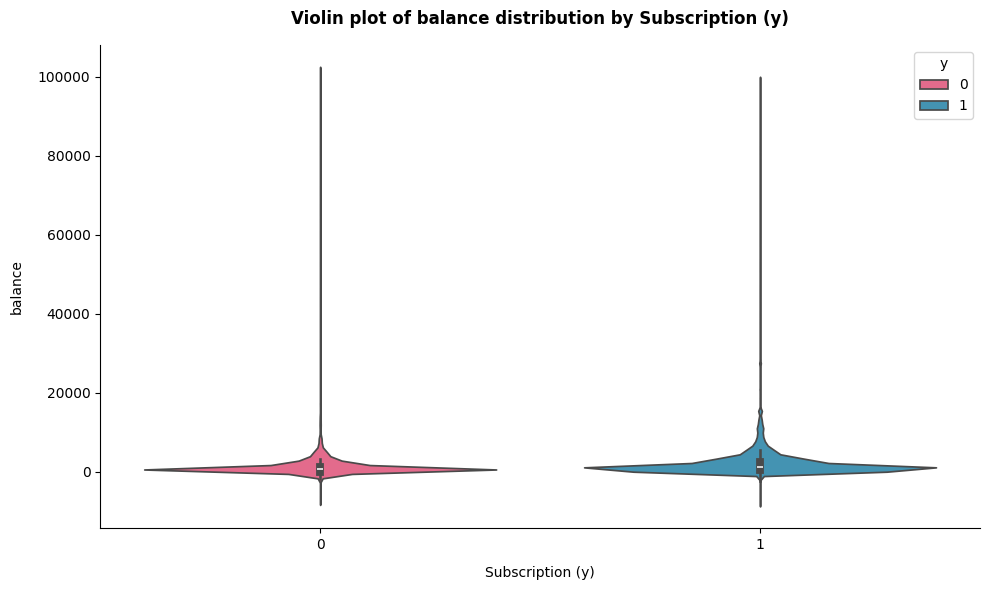

,y,Count,Mean,Median,Std
0,0,699434,16.247379,17.000000,8.206908
1,1,95777,15.019911,15.000000,8.522539


🔎 D’Agostino and Pearson Normality Test for 'day' across 'y' groups

 Group: 0 (n = 699434)
  Statistic : 206287.868
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 1 (n = 95777)
  Statistic : 25501.378
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'day' by 'y'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 36442810786.5
p-value     : 0.0

✅ Result: Statistically significant difference between the two groups (Reject H₀).
 Interpretation: Group '0' has a higher median 'day' than Group '1'.


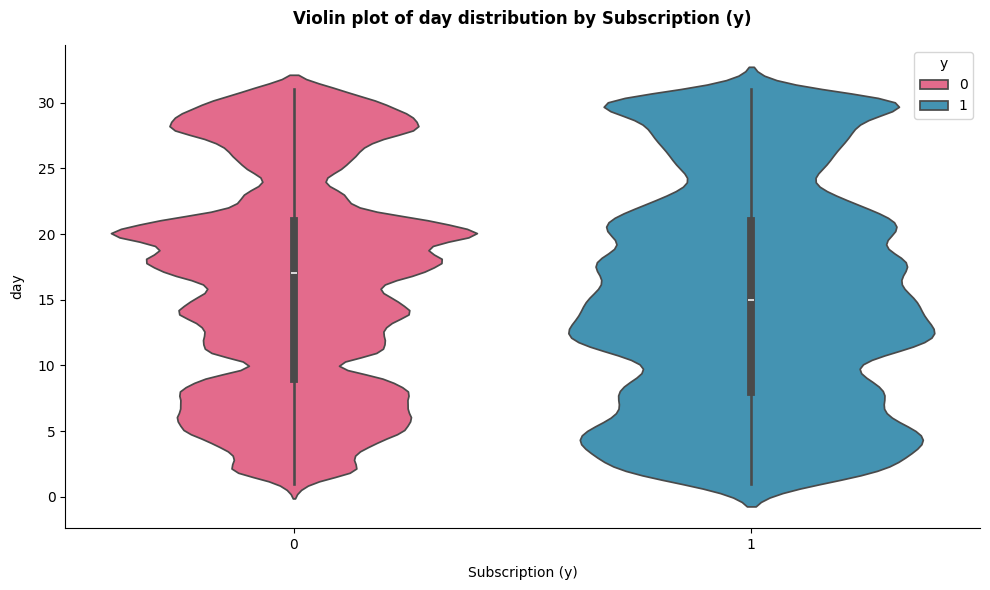

,y,Count,Mean,Median,Std
1,1,95777,632.747998,595.000000,356.277650
0,0,699434,204.795540,124.000000,210.960920


🔎 D’Agostino and Pearson Normality Test for 'duration' across 'y' groups

 Group: 0 (n = 699434)
  Statistic : 395418.733
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 1 (n = 95777)
  Statistic : 10845.135
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'duration' by 'y'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 7655600686.5
p-value     : 0.0

✅ Result: Statistically significant difference between the two groups (Reject H₀).
 Interpretation: Group '1' has a higher median 'duration' than Group '0'.


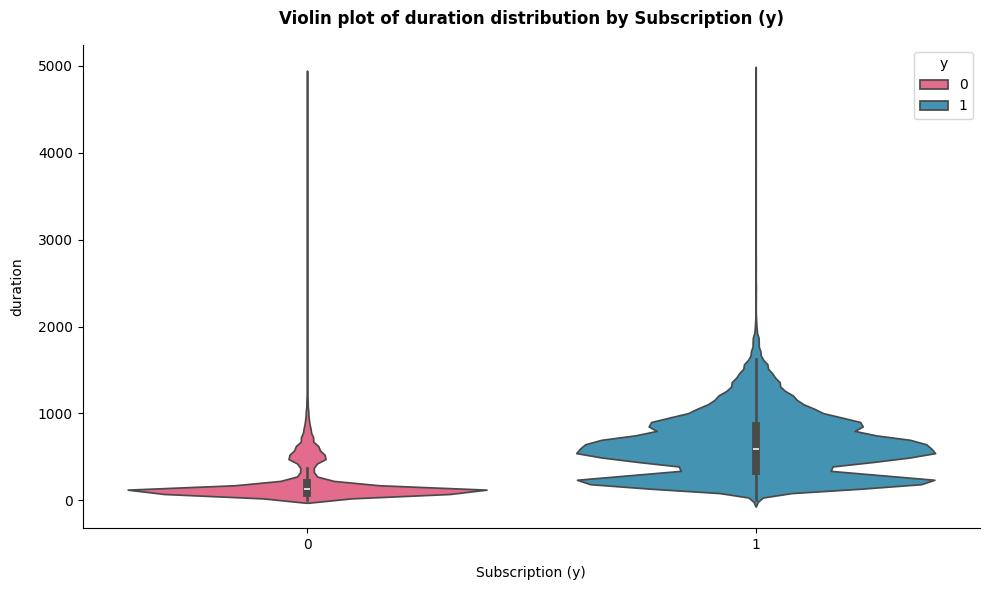

,y,Count,Mean,Median,Std
0,0,699434,2.664380,2.000000,2.839226
1,1,95777,2.027146,1.000000,1.786425


🔎 D’Agostino and Pearson Normality Test for 'campaign' across 'y' groups

 Group: 0 (n = 699434)
  Statistic : 679414.028
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 1 (n = 95777)
  Statistic : 94086.766
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'campaign' by 'y'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 38716648342.5
p-value     : 0.0

✅ Result: Statistically significant difference between the two groups (Reject H₀).
 Interpretation: Group '0' has a higher median 'campaign' than Group '1'.


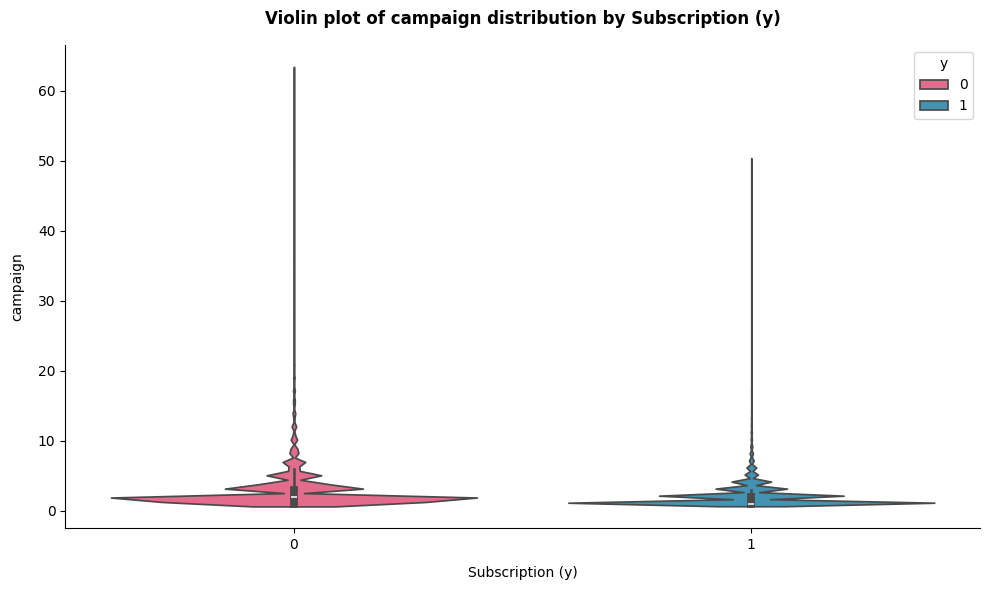

,y,Count,Mean,Median,Std
1,1,95777,42.575566,-1.000000,91.375995
0,0,699434,20.801354,-1.000000,76.664732


🔎 D’Agostino and Pearson Normality Test for 'pdays' across 'y' groups

 Group: 0 (n = 699434)
  Statistic : 527895.319
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 1 (n = 95777)
  Statistic : 54656.315
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'pdays' by 'y'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 28411330534.0
p-value     : 0.0

✅ Result: Statistically significant difference between the two groups (Reject H₀).
 Interpretation: The medians are equal, but distributions may still differ.


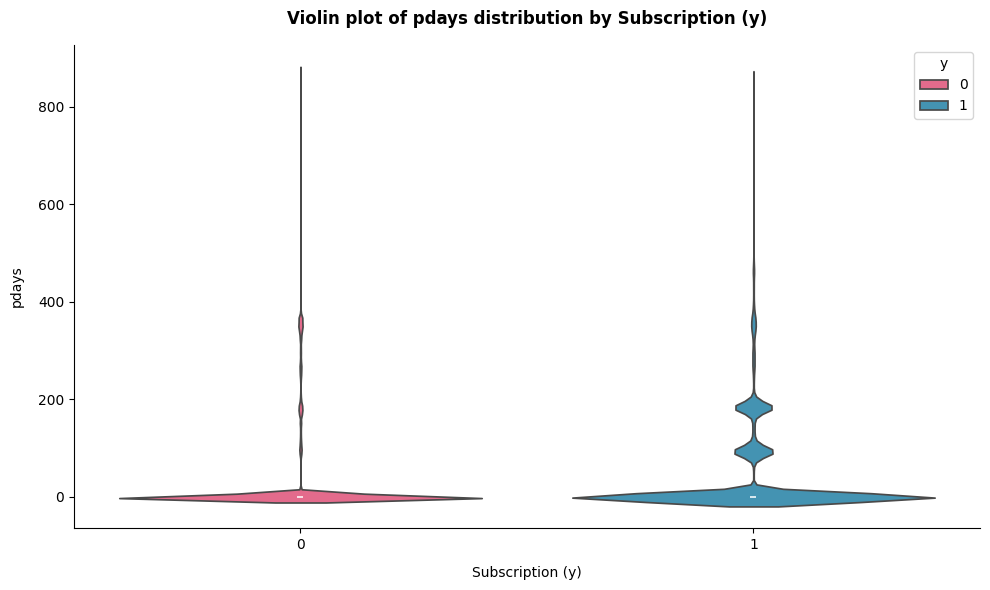

,y,Count,Mean,Median,Std
1,1,95777,0.754054,0.000000,1.951216
0,0,699434,0.254384,0.000000,1.307713


🔎 D’Agostino and Pearson Normality Test for 'previous' across 'y' groups

 Group: 0 (n = 699434)
  Statistic : 1787253.661
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 1 (n = 95777)
  Statistic : 108888.454
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'previous' by 'y'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 28059791842.5
p-value     : 0.0

✅ Result: Statistically significant difference between the two groups (Reject H₀).
 Interpretation: The medians are equal, but distributions may still differ.


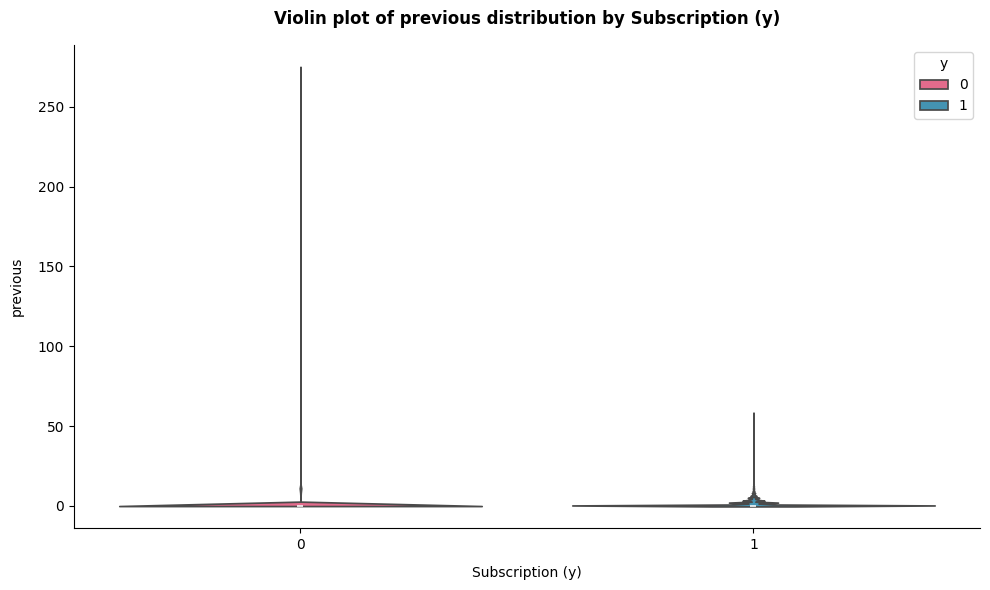

In [68]:
from IPython.core.display import HTML
def perform_statical_testing(feature, df_train = df_train_combined, total_categories = 2, target_feature = "y"):
    cal_normaltest(cat_feature=target_feature, num_feature=feature, df=df_train)
    if total_categories == 2:
        cal_mannwhitneyu(dataframe=df_train, categorical_feature=target_feature, num_feature=feature)
    else:
        pass

def plot_numerical_distribution_by_loan_status(feature, df_train = df_train_combined, target_feature = "y", order = None):
    """
    Performs statical testing for each groups (distribution by target_feature) by ANOVA, T-test, Mann-Whitney U test,... <br>
    Draw violinplot and histogram to display the distribution for each groups of feature.
    Parameters:
        feature (str): The name of the column representing the numerical variable.
        df_train (pd.DataFrame): The input dataset.
        target_feature (str): The name of the column representing the target feature.
        order (list): Order items in plot.

    Returns:
        None
    """

    # Summary information
    df_summary_feature = df_train.groupby(by = target_feature, as_index= False)\
    .agg (
        Count = (feature, "count"),
        Mean = (feature, "mean"),
        Median = (feature, "median"),
        Std = (feature, "std")
    )
    df_summary_feature = df_summary_feature.sort_values(by="Mean", ascending=False)    

    summary_data = [
        ("Overall Mean", f"{df_train[feature].mean():.2f}"),
        ("Overall Median", f"{df_train[feature].median()}"),
        ("Overall Std", f"{df_train[feature].std():.2f}")
    ]
    summary_html = "<ul>" + "".join([f"<li><b>{k}:</b> {v}</li>" for k, v in summary_data]) + "</ul>"
    display(HTML(summary_html))
    display(df_summary_feature.style.background_gradient(cmap=cm).set_table_attributes('style="width:75%; margin:auto;"'))

    perform_statical_testing(feature=feature, target_feature=target_feature)

    # Plot distribution
    fig, ax = plt.subplots(figsize=(10, 6))
    cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
    colors = [cmap(0.0), cmap(1.0)]
    sns.violinplot(x=target_feature, y=feature, data=df_train, hue=target_feature, palette=colors, ax=ax)
    ax.set_title(f"Violin plot of {feature} distribution by Subscription (y)", pad=15, weight = "bold")
    ax.set_xlabel("Subscription (y)", labelpad=10)
    ax.set_ylabel(feature, labelpad=10)
    sns.despine(left=False, bottom=False, ax=ax)
    plt.tight_layout()
    plt.show()

for feature in num_features:
    display(HTML(f"<h2 style='text-align:center; font-size:22px; color:green;'><b>Distribution of {feature} by Subscription</b></h2>"))
    plot_numerical_distribution_by_loan_status(feature=feature, df_train = df_train_combined)